### ***Libraries and dependencies***

In [86]:
use_colab = False

In [87]:
if use_colab:
    !pip install powerlaw

In [88]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import ks_1samp
import matplotlib.patches as mpatches
import powerlaw
import csv
import os
import random
import numpy as np
import json
import itertools
import pprint
import sys

if use_colab:
    # mount drive
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append("/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/imports")

    # verify the content of the directory
    !ls "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM"

if use_colab:
    import DIAMOnD as diamond
    import heat_diffusion as diffusion
    import DiaBLE as diable
    import proconsul as proconsul

else:
    import imports.DIAMOnD as diamond
    import imports.heat_diffusion as diffusion
    import imports.DiaBLE as diable
    import imports.proconsul as proconsul

Then, after importing the necessary libraries, we put all the file paths we will need in the same cell:

In [89]:
data_dir = r"data/"

# file paths
biogrid_filepath = data_dir + r"BIOGRID-ORGANISM-Homo_sapiens-4.4.240.tab3.txt"
ppi_lcc_filepath = data_dir + r"ppi_lcc_edges.tsv"
gda_filepath = data_dir + r"DISEASES_Summary_GDA_CURATED_C0854723.tsv"
gene_names_filepath = data_dir + r"gene_names.csv"
hgnc_filepath = data_dir + r"hgnc-symbol-check.csv"
disease_lcc_filepath = data_dir + r"disease_lcc.csv"
seed_genes_filepath = data_dir + r"seed_genes.txt"
seed_genes_lcc_filepath = data_dir + r"seed_genes_lcc.txt"
original_gene_filepath = data_dir + r"original_gene.csv"

for_report_directory = data_dir + r"algorithms_outputs"
diamond_output_filepath = data_dir + r"diamond_output.txt"
diable_output_filepath = data_dir + r"diable_output.txt"
diffusion_output_filepath = data_dir + r"diffusion_output.txt"
proconsul_output_filepath = data_dir + r"proconsul_output.txt"

diamond_path = data_dir + r"diamond_metrics.csv"
diable_path = data_dir + r"diable_metrics"
diffusion_path = data_dir + r"diffusion_metrics"

putative_txt_filepath = data_dir + r"putative_disease_genes.txt"
putative_csv_filepath = data_dir + r"putative_disease_genes.csv"
putative_data_dir = data_dir + r"Putative_Genes_Analysis/"
original_data_dir = data_dir + r"Original_Genes_Analysis/"
dgidb_file = data_dir + r"interactions.tsv"


if use_colab:
    biogrid_filepath = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/BIOGRID-ORGANISM-4.4.240.tab3/BIOGRID-ORGANISM-Homo_sapiens-4.4.240.tab3.txt"
    ppi_lcc_filepath = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/ppi_lcc_edges.tsv"
    gda_filepath = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/DISEASES_Summary_GDA_CURATED_C0854723.tsv"
    hgnc_filepath = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/hgnc-symbol-check.csv"
    disease_lcc_filepath = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/disease_lcc.csv"
    seed_genes_filepath = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/seed_genes.txt"
    seed_genes_lcc_filepath = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/seed_genes_lcc.txt"
    original_gene_filepath = '/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/original_gene.csv'

    for_report_directory = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM"
    diamond_output_filepath = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/diamond_output.txt"
    diable_output_filepath = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/diable_output.txt"
    diffusion_output_filepath = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/diffusion_output.txt"
    proconsul_output_filepath = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/proconsul_output.txt"

    diamond_path = '/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/diamond_metrics.csv'
    diable_path = '/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/diable_metrics.csv'
    diffusion_path = '/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/diffusion_metrics.csv'

    putative_txt_filepath = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/putative_disease_genes.txt"
    putative_csv_filepath = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/putative_disease_genes.csv"
    putative_data_dir = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/Putative_Genes_Analysis/"
    original_data_dir = "/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/Original_Genes_Analysis/"
    dgidb_file = '/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/interactions.tsv'
    gene_names_filepath = '/content/drive/MyDrive/DATA SCIENCE 23 24/2nd year/BI&NM/gene_names.txt'

putative_reactome_file = putative_data_dir + r'Reactome_Pathways_2024_table.txt'
putative_KEGG_file = putative_data_dir + r'KEGG_2021_Human_table.txt'
putative_GO_MF_file = putative_data_dir + r'GO_Molecular_Function_2023_table.txt'
putative_GO_CC_file = putative_data_dir + r'GO_Cellular_Component_2023_table.txt'
putative_GO_BP_file = putative_data_dir + r'GO_Biological_Process_2023_table.txt'

original_reactome_file = original_data_dir + r'Reactome_Pathways_2024_table.txt'
original_KEGG_file = original_data_dir + r'KEGG_2021_Human_table.txt'
original_GO_MF_file = original_data_dir + r'GO_Molecular_Function_2023_table.txt'
original_GO_CC_file = original_data_dir + r'GO_Cellular_Component_2023_table.txt'
original_GO_BP_file = original_data_dir + r'GO_Biological_Process_2023_table.txt'

### ***1. PPI and GDA data gathering and interactome reconstruction***

#### 1.1 - Gather PPI
Download PPIs from BioGRID latest release to build the ***human interactome*** (maps out how proteins in the human body interact with each other)

In [90]:
# use “all organisms” tab3 file, unzip and get “Homo sapiens” only
biogrid_dataframe = pd.read_csv(biogrid_filepath, sep="\t", low_memory=False)

> `low_memory = False` is used to process the file all at once. <br> Even though it takes more memory it ensures that the columns' types aren't misread.

Let's now check out the dataframe

In [91]:
b_shape = biogrid_dataframe.shape
print(f"The dataframe has shape: {b_shape}")

The dataframe has shape: (1265586, 37)


In [92]:
biogrid_dataframe.head()

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
0,103,6416,2318,112315,108607,-,-,MAP2K4,FLNC,JNKK|JNKK1|MAPKK4|MEK4|MKK4|PRKMK4|SAPKK-1|SAP...,...,Q59H94,NP_001120959|NP_001449,-,-,-,-,-,-,Homo sapiens,Homo sapiens
1,117,84665,88,124185,106603,-,-,MYPN,ACTN2,CMD1DD|CMH22|MYOP|RCM4,...,Q59FD9|F6THM6,NP_001094|NP_001265272|NP_001265273,-,-,-,-,-,-,Homo sapiens,Homo sapiens
2,183,90,2339,106605,108625,-,-,ACVR1,FNTA,ACTRI|ACVR1A|ACVRLK2|ALK2|FOP|SKR1|TSRI,...,-,NP_002018,-,-,-,-,-,-,Homo sapiens,Homo sapiens
3,278,2624,5371,108894,111384,-,-,GATA2,PML,DCML|IMD21|MONOMAC|NFE1B,...,-,NP_150250|NP_150253|NP_150252|NP_150247|NP_150...,-,-,-,-,-,-,Homo sapiens,Homo sapiens
4,418,6118,6774,112038,112651,RP4-547C9.3,-,RPA2,STAT3,REPA2|RP-A p32|RP-A p34|RPA32,...,-,NP_644805|NP_003141|NP_001356447|NP_001356443|...,-,-,-,-,-,-,Homo sapiens,Homo sapiens


We start by filtering out all non-human interactions, i.e., both “organism A” and “B” fields must be = 9606 (Homo sapiens)


In [93]:
# check out all the possible interactions types we have
biogrid_dataframe['Organism Name Interactor A'].unique()

array(['Homo sapiens', 'Saccharomyces cerevisiae (S288c)', 'Mus musculus',
       'Drosophila melanogaster', 'Rattus norvegicus', 'Bos taurus',
       'Xenopus laevis', 'Schizosaccharomyces pombe (972h)',
       'Arabidopsis thaliana (Columbia)', 'Gallus gallus',
       'Caenorhabditis elegans', 'Human Herpesvirus 1',
       'Human Immunodeficiency Virus 1', 'Human Herpesvirus 4',
       'Hepatitus C Virus', 'Canis familiaris',
       'Plasmodium falciparum (3D7)', 'Danio rerio',
       'Oryctolagus cuniculus', 'Human Herpesvirus 8',
       'Human Herpesvirus 2', 'Human Herpesvirus 5',
       'Human Immunodeficiency Virus 2', 'Sus scrofa', 'Pan troglodytes',
       'Oryza sativa (Japonica)', 'Ustilago maydis (521)',
       'Simian Immunodeficiency Virus', 'Human Herpesvirus 6A',
       'Human Herpesvirus 6B', 'Human Herpesvirus 3', 'Macaca mulatta',
       'Dictyostelium discoideum (AX4)', 'Ricinus communis',
       'Meleagris gallopavo', 'Vaccinia Virus',
       'Human papillomavirus 

In [94]:
# drop rows where either "Organism Name Interactor A" or "Organism Name Interactor B" is not "Homo sapiens"
biogrid_dataframe = biogrid_dataframe[biogrid_dataframe['Organism ID Interactor A'] == 9606]
biogrid_dataframe = biogrid_dataframe[biogrid_dataframe['Organism ID Interactor B'] == 9606]

# let's see how the dataframe changed:
biogrid_dataframe.shape

(1171482, 37)

>  After filtering the dataframe entries are reduced by 94104 rows

In [95]:
biogrid_dataframe["Organism Name Interactor A"].unique()

array(['Homo sapiens'], dtype=object)

> We can see that now our `biogrid_dataframe` does indeed contain just human interactions

We proceed by keeping only “physical” interactions:

In [96]:
# first check out the type of interactions we have
biogrid_dataframe['Experimental System Type'].unique()

array(['physical', 'genetic'], dtype=object)

In [97]:
# all physical interactions are such that Experimental System Type = physical
biogrid_dataframe = biogrid_dataframe[biogrid_dataframe['Experimental System Type'] == 'physical']

> BioGRID categorizes interactions into two main types: ***physical*** and ***genetic***. <br>
> ***Physical interactions*** refer to direct binding or close proximity between two proteins, providing evidence of a physical association. <br>
> ***Genetic interactions*** represent indirect functional relationships between proteins, inferred from genetic evidence, such as dependencies or regulatory effects, without necessarily implying physical contact. Sometimes they may introduce noise into a physical interactome, as these interactions do not necessarily imply direct binding.

Lastly we remove self loops:

In [98]:
biogrid_dataframe = biogrid_dataframe[biogrid_dataframe['Official Symbol Interactor A'] != biogrid_dataframe['Official Symbol Interactor B']]
biogrid_dataframe.shape

(1144808, 37)

> A self-loop occurs when an interactor (e.g., a gene or protein) interacts with a copy of itself. Self-loops may not be meaningful for certain analyses, so they're typically removed.

Now we can create our ***Human Interactome*** :

> Since we used the NetworkX Graph class instead of the MultiGraph class redundant edges will automatically be ignored, reventing duplicate edges.

In [99]:
biogrid_graph = nx.Graph()

for _, row in biogrid_dataframe.iterrows(): # (index, row)
    biogrid_graph.add_edge(row["Official Symbol Interactor A"], row["Official Symbol Interactor B"])

print(biogrid_graph)

Graph with 19972 nodes and 861240 edges


Subsequentially we retrieve the ***Largest Connected Component (LCC)***

> The Largest Connected Component (LCC) of a graph is the largest subset of nodes where every pair of nodes is connected by at least one path, and among all connected components in the graph it contains the highest number of nodes

In [100]:
print(f"There are {nx.number_connected_components(biogrid_graph)} connected components in the graph.")

# isolate the largest connected component (interactome LCC)
biogrid_graph = biogrid_graph.subgraph(max(nx.connected_components(biogrid_graph), key=len))

# "key = len" specifies that size is the criterion of choice on the max function
print(biogrid_graph)

There are 1 connected components in the graph.
Graph with 19972 nodes and 861240 edges


Then we can try to visualize the interactome. Since the graph is very big computing the plot takes a long time (around 15 minutes on our machine), so we provide an already computed image for the whole LCC.

In [101]:
# real output is excluded to reduce computation time since it would take around 6 minutes to run

# nx.average_clustering(biogrid_graph)
print(f"0.13632454917886333")

0.13632454917886333


In [102]:
'''
plt.figure(figsize=(10, 10))
nx.draw(biogrid_graph,
        with_labels=False,
        node_size=30,
        font_size=8,
        edge_color="gray",
        node_color="blue",
        alpha=0.7)
plt.title(f"Human interactome graph")
plt.show()
''';

![image](images/interactome.png)


Is it interesting to check if the interactome we retrieved follows a power-law distribution, so we perform a test.

Calculating best minimal value for power law fit


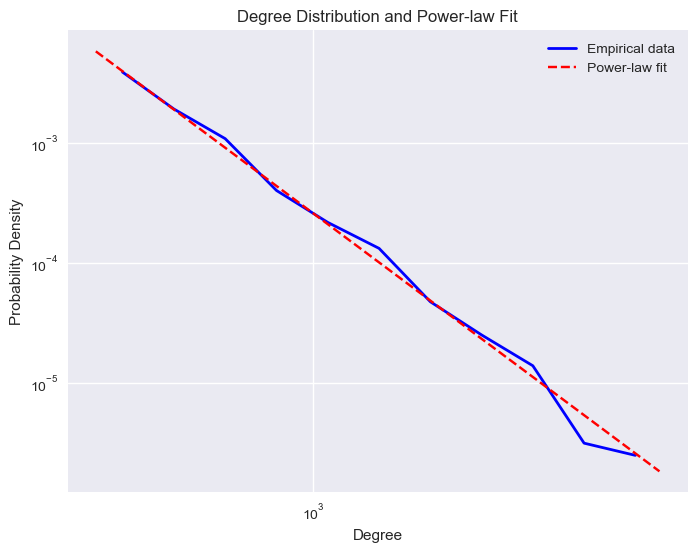

In [103]:
# get degrees
degrees = [degree for _, degree in biogrid_graph.degree()]

# fit to power law
fit = powerlaw.Fit(degrees)

# plot the degree distribution and the power law fit
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(8, 6))
fit.plot_pdf(color='blue', linewidth=2, label='Empirical data')
fit.power_law.plot_pdf(color='red', linestyle='--', label='Power-law fit')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Probability Density')
plt.title('Degree Distribution and Power-law Fit')
plt.show()

In [104]:
alpha = fit.power_law.alpha
xmin = fit.power_law.xmin

# compute empirical and theoretical CDFs
empirical_cdf = np.sort(np.array(degrees)[np.array(degrees) >= xmin])
empirical_cdf_prob = np.arange(1, len(empirical_cdf) + 1) / len(empirical_cdf)

theoretical_cdf = lambda x: 1 - (x / xmin) ** (1 - alpha)
theoretical_cdf_prob = theoretical_cdf(empirical_cdf)

# compute KS statistic and p-value
ks_statistic, p_value = ks_1samp(empirical_cdf, theoretical_cdf)

# results
print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

KS Statistic: 0.022438711737409966
P-Value: 0.8054724833981037


We make another plot showing in more detail the very core of the network, that is the interconnections between nodes that have an high degree.

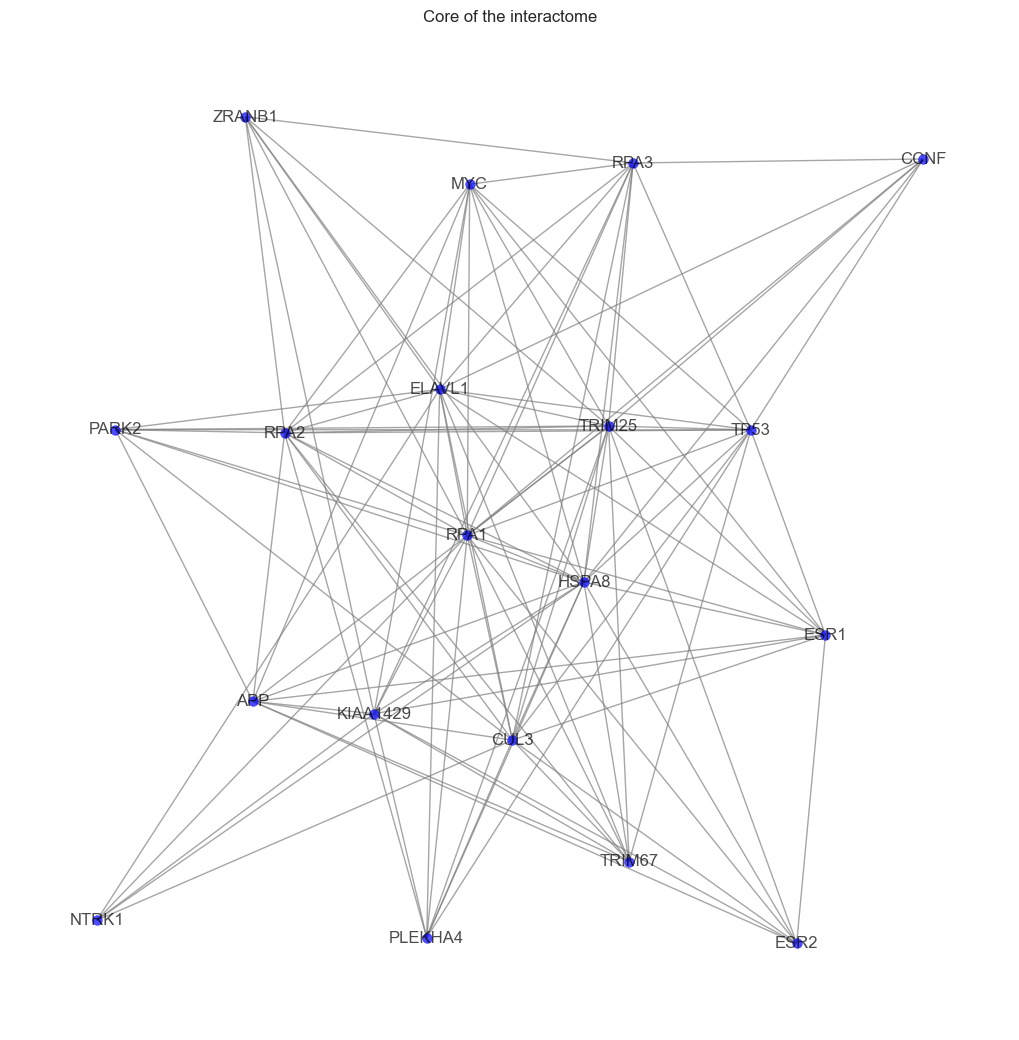

In [105]:
n = 2000

# filter nodes with degree >= n
nodes_with_enough_degree = [node for node, degree in biogrid_graph.degree() if degree >= n]

# create a subgraph with the sampled nodes
sample_subgraph = biogrid_graph.subgraph(nodes_with_enough_degree)

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 10))
nx.draw(sample_subgraph,
        with_labels=True,
        node_size=50,
        font_size=12,
        edge_color="gray",
        node_color="blue",
        alpha=0.7)
plt.title(f"Core of the interactome")
plt.show()

In [106]:
n_nodes = len(sample_subgraph.nodes)

expected_edges = n_nodes * (n_nodes - 1) // 2
completeness = len(sample_subgraph.edges) / expected_edges

print(f"Completeness of the core of the network: {completeness}")

Completeness of the core of the network: 0.6023391812865497


Now let' save the LCC:

In [107]:
# saved in tsv format since it is the format required by DIAMOnD
nx.write_edgelist(biogrid_graph, ppi_lcc_filepath, delimiter="\t", data=False)

#### 1.2. - Gather gene-disease associations

Gather gene-disease associations (GDAs) of the disease assigned is provided (DisGeNet starting this year is behind a paywall) along with these instructions in the file `DISEASES_Summary_GDA_CURATED_id.tsv`

> A ***gene-disease association*** refers to the relationship between a specific gene (or its variations) and a particular disease. These associations indicate how changes in a gene (e.g., mutations, deletions, duplications) contribute to the development, progression, or risk of a disease

In [108]:
gda_dataframe = pd.read_csv(gda_filepath, sep='\t', header=0, low_memory=False)

# let's check the structure of the GDA dataframe:
print(gda_dataframe.shape)
gda_dataframe.head()

(263, 33)


,DOClass,Disease,DiseaseClass,EvidenceIndexGDA,EvidenceLevelGDA,FirstRef,Gene,GeneDPI,GeneDSI,GeneFullName,...,SemanticType,Type,UnitProt,diseaseUMLSCUI,geneEnsemblIDs,geneNcbiID,geneNcbiType,numCTs,numberChemsIncludedInEvidence,numberPmidsWithChemsIncludedInEvidence
0,disease of anatomical entity (7),Retinal dystrophy,Eye Diseases,0.983333,NaN,1978.0,PRPH2,0.83,0.52,peripherin 2,...,Disease or Syndrome (T047),disease,P23942,C0854723,ENSG00000112619,5961,protein-coding,0,0,0
1,disease of anatomical entity (7),Retinal dystrophy,Eye Diseases,0.946667,NaN,1997.0,ABCA4,0.91,0.46,ATP binding cassette subfamily A member 4,...,Disease or Syndrome (T047),disease,"Q6AI28,P78363",C0854723,ENSG00000198691,24,protein-coding,0,0,0
2,disease of anatomical entity (7),Retinal dystrophy,Eye Diseases,0.980392,NaN,1997.0,RPE65,0.91,0.49,retinoid isomerohydrolase RPE65,...,Disease or Syndrome (T047),disease,Q16518,C0854723,ENSG00000116745,6121,protein-coding,0,0,0
3,disease of anatomical entity (7),Retinal dystrophy,Eye Diseases,1.000000,NaN,2002.0,RPGR,0.83,0.50,retinitis pigmentosa GTPase regulator,...,Disease or Syndrome (T047),disease,Q92834,C0854723,ENSG00000156313,6103,protein-coding,0,0,0
4,disease of anatomical entity (7),Retinal dystrophy,Eye Diseases,1.000000,NaN,1999.0,CRB1,0.87,0.53,crumbs cell polarity complex component 1,...,Disease or Syndrome (T047),disease,"A8K118,B7Z826,A0A7D6VM04,B7Z824,F5H0L2,P82279",C0854723,ENSG00000134376,23418,protein-coding,0,0,0


Then we perform cleanup of all non 'protein-coding' disease genes. This is not written in the homework but it has been said by professor Tieri during a lecture.

In [109]:
gda_dataframe = gda_dataframe[gda_dataframe["geneNcbiType"] == r"protein-coding"]

print(gda_dataframe.shape)
gda_dataframe.head()

(216, 33)


,DOClass,Disease,DiseaseClass,EvidenceIndexGDA,EvidenceLevelGDA,FirstRef,Gene,GeneDPI,GeneDSI,GeneFullName,...,SemanticType,Type,UnitProt,diseaseUMLSCUI,geneEnsemblIDs,geneNcbiID,geneNcbiType,numCTs,numberChemsIncludedInEvidence,numberPmidsWithChemsIncludedInEvidence
0,disease of anatomical entity (7),Retinal dystrophy,Eye Diseases,0.983333,NaN,1978.0,PRPH2,0.83,0.52,peripherin 2,...,Disease or Syndrome (T047),disease,P23942,C0854723,ENSG00000112619,5961,protein-coding,0,0,0
1,disease of anatomical entity (7),Retinal dystrophy,Eye Diseases,0.946667,NaN,1997.0,ABCA4,0.91,0.46,ATP binding cassette subfamily A member 4,...,Disease or Syndrome (T047),disease,"Q6AI28,P78363",C0854723,ENSG00000198691,24,protein-coding,0,0,0
2,disease of anatomical entity (7),Retinal dystrophy,Eye Diseases,0.980392,NaN,1997.0,RPE65,0.91,0.49,retinoid isomerohydrolase RPE65,...,Disease or Syndrome (T047),disease,Q16518,C0854723,ENSG00000116745,6121,protein-coding,0,0,0
3,disease of anatomical entity (7),Retinal dystrophy,Eye Diseases,1.000000,NaN,2002.0,RPGR,0.83,0.50,retinitis pigmentosa GTPase regulator,...,Disease or Syndrome (T047),disease,Q92834,C0854723,ENSG00000156313,6103,protein-coding,0,0,0
4,disease of anatomical entity (7),Retinal dystrophy,Eye Diseases,1.000000,NaN,1999.0,CRB1,0.87,0.53,crumbs cell polarity complex component 1,...,Disease or Syndrome (T047),disease,"A8K118,B7Z826,A0A7D6VM04,B7Z824,F5H0L2,P82279",C0854723,ENSG00000134376,23418,protein-coding,0,0,0


Finally create list of genes as txt file:

In [110]:
genes = gda_dataframe['Gene']

with open(gene_names_filepath, "w") as file:
    file.write("\n".join(genes))

Then we copied the content of the file "gene_names.csv" into che text box of HGNC (https://www.genenames.org/tools/multi-symbol-checker/) and downloaded the resulting symbol check list as a csv file.

In [111]:
hgnc = pd.read_csv(hgnc_filepath, sep=',', header=1)

We can now have a look at the distribution of the symbol matches:

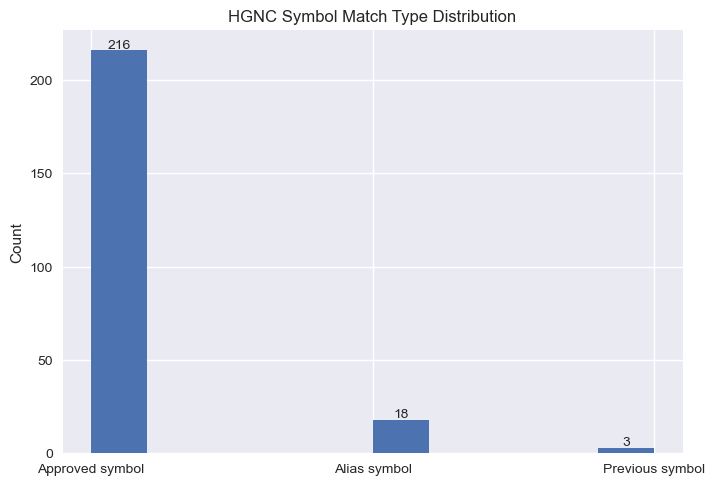

In [112]:
ax = hgnc["Match type"].hist()
for bar in ax.patches:         # iterate through each bar in the bar chart
    height = bar.get_height()  # get the height of the bar
    if height > 0:             # only annotate bars with a non-zero height

        ax.text(bar.get_x() + bar.get_width() / 2,  # x position (center of the bar)
                height + 1,                         # y position (just above the bar)
                str(int(height)),                   # The value to display
                ha='center',                        # center the text horizontally
                fontsize=10)

# add labels and title
plt.ylabel("Count")
plt.title("HGNC Symbol Match Type Distribution")
plt.xticks(rotation=0)
plt.show()

> From the histogram we can see that the majority of the gene symbols are recognized as official HGNC-approved symbols (216).<br>
A smaller number of symbols match aliases (18), which are alternative names for official symbols.And A few symbols (3) matched outdated names that have been replaced with new official symbols

Then we can check for duplicates by looking at the "Input" column in the hgnc file:

In [113]:
duplicate_genes = hgnc[hgnc.duplicated(subset=['Input'], keep=False)]
 # keep = False ensures that all occurrences of duplicates are marked as True

print(f"{duplicate_genes.shape[0]}")
duplicate_genes

37


,Input,Match type,Approved symbol,Approved name,HGNC ID,Location
5,RHO,Approved symbol,RHO,rhodopsin,HGNC:10012,3q22.1
6,RHO,Alias symbol,RHOD,ras homolog family member D,HGNC:670,11q13.2
8,TTLL5,Approved symbol,TTLL5,tubulin tyrosine ligase like 5,HGNC:19963,14q24.3
9,TTLL5,Previous symbol,TTLL10,tubulin tyrosine ligase like 10,HGNC:26693,1p36.33
19,RP1,Approved symbol,RP1,RP1 axonemal microtubule associated,HGNC:10263,8q11.23-q12.1
20,RP1,Alias symbol,TMEM184B-AS1,TMEM184B antisense RNA 1,HGNC:56716,22q13.1
21,RP1,Alias symbol,WHR1,winged helix repair factor 1,HGNC:11398,6p21.33
22,RP1,Alias symbol,MAPRE2,microtubule associated protein RP/EB family me...,HGNC:6891,18q12.1-q12.2
31,C1QTNF5,Approved symbol,C1QTNF5,C1q and TNF related 5,HGNC:14344,11q23.3
32,C1QTNF5,Alias symbol,MFRP,membrane frizzled-related protein,HGNC:18121,11q23.3


We can remove duplicates by:
1. Mapping specific gene symbols from the input column to approved values in the approved symbol column using a predefined duplicate_mapping dictionary.

2. After replacing these values, duplicates in the Input column are removed using the drop_duplicates method, retaining only the first occurrence of each duplicate.

3. Finally, we count any unmatched entries by filtering rows where the Match type is labeled as 'Unmatched'.

Details on the manual symbol checking:
- RHO, TTL5, RP1, ... : we used the full name to choose among those options;
- C1QTNF5, RP2, ... : we used the GeneEnsembleID

In [114]:
duplicate_mapping = {
    "RHO" : "RHO",
    "TTL5" : "TTL5" ,
    "RP1" : "MAPRE2",
    "C1QTNF5" : "C1QTNF5",
    "RGR": "RGR",
    "RS1": "RS1",
    "RP2" : "RP2",
    "RBP3" : "RBP3",
    "MAK" : "MAK",
    "INPP5E" : "INPP5E",
    "SPP2": "SPP2",
    "CDH3": "CDH3",
    "OPA1" : "OPA1",
    "RILP" : "RILP",
    "HK1" : "HK1",
    "SAG" : "SAG"
}

# Now replace the duplicated
hgnc['Approved symbol'] = hgnc['Input'].replace(duplicate_mapping)

hgnc = hgnc.drop_duplicates(subset=['Input'], keep='first')

hgnc[hgnc["Match type"]=="Unmatched"].count()

Input              0
Match type         0
Approved symbol    0
Approved name      0
HGNC ID            0
Location           0
dtype: int64

In [115]:
hgnc.head()

,Input,Match type,Approved symbol,Approved name,HGNC ID,Location
0,PRPH2,Approved symbol,PRPH2,peripherin 2,HGNC:9942,6p21.1
1,ABCA4,Approved symbol,ABCA4,ATP binding cassette subfamily A member 4,HGNC:34,1p22.1
2,RPE65,Approved symbol,RPE65,retinoid isomerohydrolase RPE65,HGNC:10294,1p31.3
3,RPGR,Approved symbol,RPGR,retinitis pigmentosa GTPase regulator,HGNC:10295,Xp11.4
4,CRB1,Approved symbol,CRB1,crumbs cell polarity complex component 1,HGNC:2343,1q31.3


In [116]:
# create a mapping dictionary
mapping_dict = dict(zip(hgnc['Input'], hgnc['Approved symbol']))

# keep original gene names for unmapped genes
gda_dataframe.loc[:, 'Gene'] = gda_dataframe['Gene'].map(mapping_dict).fillna(gda_dataframe['Gene'])

# save the dataframe
original_gene = gda_dataframe['Gene']

original_gene.to_csv(original_gene_filepath, index=False)
print(f"File saved successfully at {original_gene_filepath}")

File saved successfully at data/original_gene.csv


### 1.3. Compute and characterize the disease LCC and its basic network measures.

Check for the presence of disease genes in the interactome LCC (as from point 1.1) and identify the disease interactome by getting the interactions among disease genes only, and the disease LCC (i.e. the LCC of the disease interactome)

We start with loading the PPI LCC and creating the PPI graph:

In [117]:
# load the PPI LCC
ppi_lcc_graph = nx.read_edgelist(ppi_lcc_filepath)

# initialize node attributes; type initialized to None is a placeholder
nx.set_node_attributes(ppi_lcc_graph, None, 'type')

Then we can tag the disease genes inside the LCC and create a subgraph with just those genes:

In [118]:
# we first check which genes from the GDA is present in the PPI LCC,
# and if they are we tag it as a disease gene

non_present_genes = []

i = 0
for gene in gda_dataframe['Gene']:
    if gene in ppi_lcc_graph.nodes():
      ppi_lcc_graph.nodes[gene]['type'] = "disease"
      i += 1
    else:
      non_present_genes.append(gene)

# 199 of the 216 genes are inside the ppi lcc
print(f"The number of genes in the LCC are {i}")

print(f"The non present genes are {len(non_present_genes)}.")
non_present_genes

The number of genes in the LCC are 199
The non present genes are 17.


['IMPG2',
 'CFAP410',
 'RAX2',
 'CFAP418',
 'ADGRA3',
 'KCNJ13',
 'WHRN',
 'CACNA2D4',
 'PCARE',
 'GUCA1ANB-GUCA1A',
 'CEMIP2',
 'HARS1',
 'SPP2',
 'ADGRV1',
 'RLIG1',
 'C10orf105',
 'ATP5ME']

We can perform a failure analysis for genes that are not in the PPI LCC. Are they present at all in the BIOGRID file?

In [119]:
obdf = pd.read_csv(biogrid_filepath, sep="\t", low_memory=False)

obdf[obdf['Official Symbol Interactor A'].isin(non_present_genes) | obdf['Official Symbol Interactor B'].isin(non_present_genes)]

,#BioGRID Interaction ID,Entrez Gene Interactor A,Entrez Gene Interactor B,BioGRID ID Interactor A,BioGRID ID Interactor B,Systematic Name Interactor A,Systematic Name Interactor B,Official Symbol Interactor A,Official Symbol Interactor B,Synonyms Interactor A,...,TREMBL Accessions Interactor B,REFSEQ Accessions Interactor B,Ontology Term IDs,Ontology Term Names,Ontology Term Categories,Ontology Term Qualifier IDs,Ontology Term Qualifier Names,Ontology Term Types,Organism Name Interactor A,Organism Name Interactor B
1061977,3410865,55193,414152,120490,135942,-,RP11-472K8.2,PBRM1,C10orf105,BAF180|PB1,...,-,NP_001157847|NP_001161862,HP:0001507,Growth abnormality,phenotype,PATO:0000169,viability,-,Homo sapiens,Homo sapiens
1157947,3541790,29035,6694,118829,112572,-,-,C16orf72,SPP2,PRO0149,...,-,NP_008875,HP:0001507,Growth abnormality,phenotype,PATO:0000169,viability,-,Homo sapiens,Homo sapiens


2 out of 17 genes are present in the BIOGRID file but not found in the PPI LCC because the recorded interaction is not physical. We now verify if the remaning genes are not present due to an error with the HGNC symbol checker.

In [120]:
for gene in non_present_genes:
    if gene not in obdf["Official Symbol Interactor A"].values or gene in obdf["Official Symbol Interactor B"].values:
        print(gene)

IMPG2
CFAP410
RAX2
CFAP418
ADGRA3
KCNJ13
WHRN
CACNA2D4
PCARE
GUCA1ANB-GUCA1A
CEMIP2
HARS1
SPP2
ADGRV1
RLIG1
C10orf105
ATP5ME


If we take this like and feed it again to HGNC we can find that all those gene names are not ambigous, they are all approved symbols for specific genes. This make us sure that their absence is due to an error we made.

Let's continue with the analysis of the disease LCC:

In [121]:
# create a subgraph only with nodes having the 'type' = disease

disease_gene_nodes = [node for node, data in ppi_lcc_graph.nodes(data=True) if 'type' in data and data['type'] == "disease"]
# "data = True" returns the nodes along with their associated attributes

disease_interactome = ppi_lcc_graph.subgraph(disease_gene_nodes).copy()

print("Number of nodes in disease_interactome:", disease_interactome.number_of_nodes())
print("Number of edges in disease_interactome:", disease_interactome.number_of_edges())

Number of nodes in disease_interactome: 199
Number of edges in disease_interactome: 140


And now we can plot the PPI LCC restricted to only disease genes:

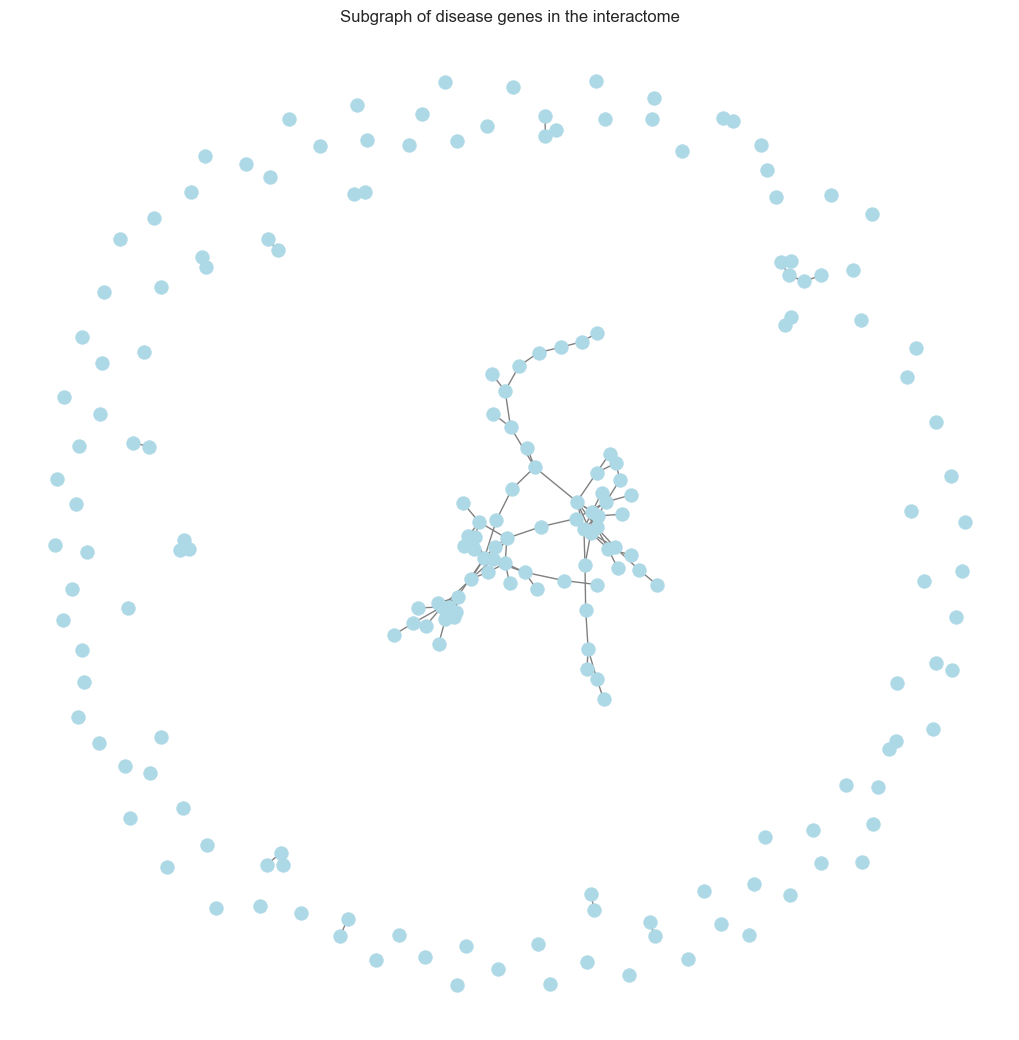

In [122]:
plt.figure(figsize=(10, 10))

nx.draw(disease_interactome,
        with_labels=False,
        node_size=100,
        edge_color="gray",
        node_color="lightblue",
        font_size=6)

plt.title("Subgraph of disease genes in the interactome")
plt.show()

From the plot we can notice immediately a Largest Connected Component.

Even if it is evident from the plot we write code to we can verify wheter GDA is a connected graph or not, in that case retrieve only the LCC:

In [123]:
# check if GDA is connected
if nx.is_connected(disease_interactome):
  print("disease_interactome is a connected graph.")
  disease_interactome_lcc = disease_interactome.copy()

else:
  print("disease_interactome is not a connected graph.")
  # bet the largest connected component
  disease_interactome_lcc = max(nx.connected_components(disease_interactome), key=len)
  disease_interactome_lcc = disease_interactome.subgraph(disease_interactome_lcc).copy()

print("Number of nodes in LCC:", disease_interactome_lcc.number_of_nodes())
print("Number of edges in LCC:", disease_interactome_lcc.number_of_edges())

disease_interactome is not a connected graph.
Number of nodes in LCC: 72
Number of edges in LCC: 120


We can now plot the extracted LCC:

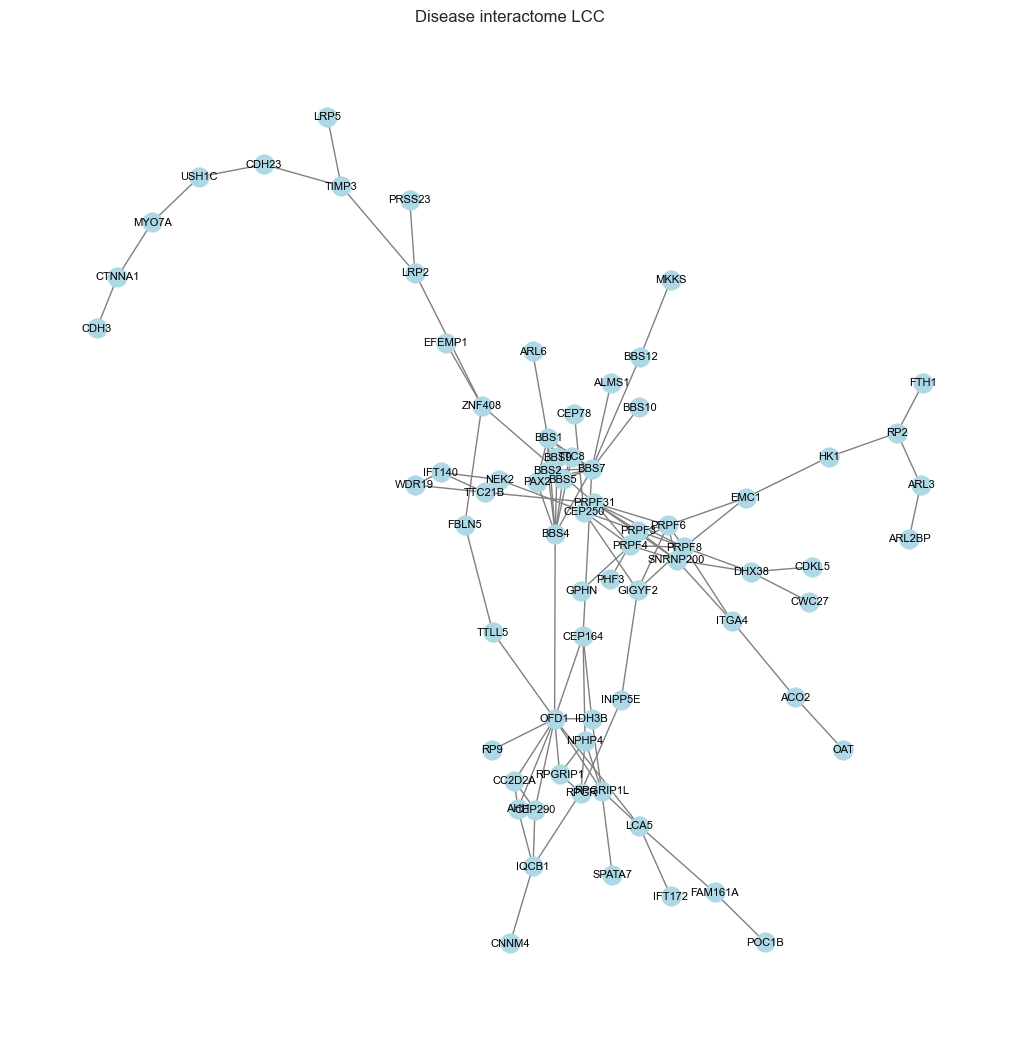

In [124]:
plt.figure(figsize=(10, 10))

nx.draw(disease_interactome_lcc,
        with_labels=True,
        node_color="lightblue",
        edge_color="gray",
        node_size=200,
        font_size=8)

plt.title("Disease interactome LCC")
plt.show()

We save files for later use:

In [125]:
# save seed genes names file for algorithms

with open(seed_genes_filepath, "w") as file:
    for node in disease_interactome.nodes:
        file.write(f"{node}\n")

with open(seed_genes_lcc_filepath, "w") as file:
    for node in disease_interactome_lcc.nodes:
        file.write(f"{node}\n")

#### ***Metrics*** <br>
Compute the following network metrics on the disease LCC:
- Node degree
- Betweenness centrality
- Eigenvector centrality
- Closeness centrality
- ratio Betweenness/Node degree

In [126]:
# let's check the disease interactome LCC structure
print(disease_interactome_lcc)

Graph with 72 nodes and 120 edges


For each node we first create a empty dictionary to store locally computed measures. Once populated, the data structure will be a dictionary of dictionaries.

In [127]:
def print_dict(string, dictionary, n=5):
    """
    Utility function to display only the first n elements
    of a dictionary. We will set n to see just the first 5
    genes for showing the code, but we can change it to 50
    as requested in the assignment.
    """

    dictionary = dict(dictionary)

    out = dict(itertools.islice(dictionary.items(), n))
    print(string)
    print("-" * len(string))
    pprint.pprint(out)
    print("")

nodes = disease_interactome_lcc.nodes()
gene_measures = dict(nodes)
print_dict("Gene measures dictionary:", gene_measures)

Gene measures dictionary:
-------------------------
{'BBS10': {'type': 'disease'},
 'BBS7': {'type': 'disease'},
 'IDH3B': {'type': 'disease'},
 'RPGRIP1L': {'type': 'disease'},
 'SPATA7': {'type': 'disease'}}



##### ***Node Degree***
> Node Degree quantifies the number of direct connections a node has within the network.

In [128]:
# compute all node degrees
degrees = disease_interactome_lcc.degree()

print_dict("Degrees:", degrees)

Degrees:
--------
{'BBS10': 1, 'BBS7': 11, 'IDH3B': 3, 'RPGRIP1L': 6, 'SPATA7': 1}



In [129]:
# save the computed measure as node attribute

for gene in gene_measures:
    gene_measures[gene]["Degree"] = degrees[gene]

print_dict("Gene measures:", gene_measures)

Gene measures:
--------------
{'BBS10': {'Degree': 1, 'type': 'disease'},
 'BBS7': {'Degree': 11, 'type': 'disease'},
 'IDH3B': {'Degree': 3, 'type': 'disease'},
 'RPGRIP1L': {'Degree': 6, 'type': 'disease'},
 'SPATA7': {'Degree': 1, 'type': 'disease'}}



##### ***Betweeness centrality***
> Betweenness centrality measures how often a node acts as a bridge along the shortest paths between other nodes.

In [130]:
# compute betweenness.
bet = nx.betweenness_centrality(disease_interactome_lcc)
print_dict("Betweenness:", bet)

# save the measure as node attribute.
for gene in gene_measures:
    gene_measures[gene]["Betwenness"] = bet[gene]

#print_dict("Gene measures:", gene_measures)

Betweenness:
------------
{'BBS10': 0.0,
 'BBS7': 0.13215291750503022,
 'IDH3B': 0.0012743125419181756,
 'RPGRIP1L': 0.11006036217303823,
 'SPATA7': 0.0}



##### ***Eigenvector centrality***
> Eigenvector centrality evaluates a node's influence based on the importance of its neighbors.

In [131]:
eigen = nx.eigenvector_centrality(disease_interactome_lcc)
print_dict("Eigenvector centrality:", eigen)

for gene in gene_measures:
    gene_measures[gene]["Eigen"] = bet[gene]

# print_dict("Gene measures:", gene_measures)

Eigenvector centrality:
-----------------------
{'BBS10': 0.06123378180453203,
 'BBS7': 0.4003805625387392,
 'IDH3B': 0.033064239668001864,
 'RPGRIP1L': 0.029873619481024447,
 'SPATA7': 0.00456884702736677}



##### ***Closeness centrality***
> Closeness centrality reflects how quickly a node can reach all other nodes in the network.

In [132]:
close = nx.closeness_centrality(disease_interactome_lcc)
print_dict("Closeness centrality:", close)

for gene in gene_measures:
    gene_measures[gene]["Closeness"] = close[gene]

# print_dict("Gene measures:", gene_measures)

Closeness centrality:
---------------------
{'BBS10': 0.1591928251121076,
 'BBS7': 0.18882978723404256,
 'IDH3B': 0.20821114369501467,
 'RPGRIP1L': 0.2268370607028754,
 'SPATA7': 0.185378590078329}



##### ***Ratio Betweenness/Degree***
> This ratio highlights how influential a node is relative to its immediate connections.

In [133]:
# compute ratio betweenness/Degree.
bet = nx.betweenness_centrality(disease_interactome_lcc)
print_dict("Betweenness:", bet)

# Save the measure as node attribute.
for gene in gene_measures:
    gene_measures[gene]["Ratio Betwenness/Degree"] = bet[gene]/gene_measures[gene]["Degree"]

Betweenness:
------------
{'BBS10': 0.0,
 'BBS7': 0.13215291750503022,
 'IDH3B': 0.0012743125419181756,
 'RPGRIP1L': 0.11006036217303823,
 'SPATA7': 0.0}



The overall structure has this form:

In [134]:
print_dict("Gene measures:", gene_measures)

Gene measures:
--------------
{'BBS10': {'Betwenness': 0.0,
           'Closeness': 0.1591928251121076,
           'Degree': 1,
           'Eigen': 0.0,
           'Ratio Betwenness/Degree': 0.0,
           'type': 'disease'},
 'BBS7': {'Betwenness': 0.13215291750503022,
          'Closeness': 0.18882978723404256,
          'Degree': 11,
          'Eigen': 0.13215291750503022,
          'Ratio Betwenness/Degree': 0.012013901591366383,
          'type': 'disease'},
 'IDH3B': {'Betwenness': 0.0012743125419181756,
           'Closeness': 0.20821114369501467,
           'Degree': 3,
           'Eigen': 0.0012743125419181756,
           'Ratio Betwenness/Degree': 0.00042477084730605853,
           'type': 'disease'},
 'RPGRIP1L': {'Betwenness': 0.11006036217303823,
              'Closeness': 0.2268370607028754,
              'Degree': 6,
              'Eigen': 0.11006036217303823,
              'Ratio Betwenness/Degree': 0.01834339369550637,
              'type': 'disease'},
 'SPATA7': {'Be

Let's now save the metrics in a `.json` file that we will use to make *Table 2* in the report.




In [135]:
# create the directory if it doesn't exist
os.makedirs(for_report_directory, exist_ok=True)

# Full path to save the file
file_path = os.path.join(for_report_directory, "gene_measures.json")

# Save the dictionary as a JSON file
with open(file_path, 'w') as json_file:
    json.dump(gene_measures, json_file, indent=4)

print(f"File saved at: {file_path}")

File saved at: data/algorithms_outputs\gene_measures.json


Finally we represent node degree and node betweenness in a scatterplot:

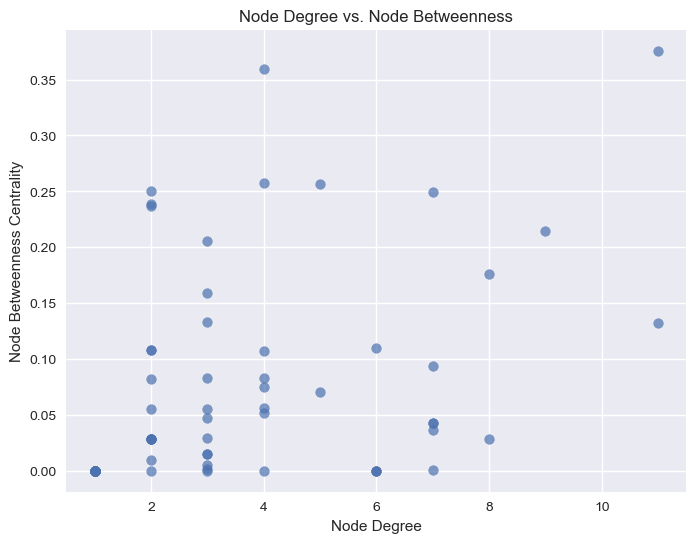

In [136]:
# extract degree and betweenness centrality for each node
degree = [gene_measures[gene]["Degree"] for gene in gene_measures]
betweenness = [gene_measures[gene]["Betwenness"] for gene in gene_measures]

# create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(degree, betweenness, alpha=0.7)
plt.xlabel("Node Degree")
plt.ylabel("Node Betweenness Centrality")
plt.title("Node Degree vs. Node Betweenness")
plt.grid(True)
plt.show()

The scatter plot of node degree versus betweenness centrality provides insights into the network's structure and function. Most nodes in the plot have a low degree (few connections) and low betweenness centrality, indicating that they play localized roles and are not critical for the network’s overall connectivity. In contrast, nodes with high betweenness centrality but relatively few connections act as bridges, linking otherwise disconnected parts of the network. These bridges are essential for maintaining communication across different regions, and their removal could fragment the network. Nodes with a high degree, known as hubs, are highly connected and integrate large portions of the network, but they do necessarly serve as intermediaries between different sections.

In the context of a disease network, the small diameter of the Largest Connected Component (LCC) suggests a tightly interconnected structure, allowing processes such as the spread of mutations or interactions between genes to occur efficiently. Bridges play a particularly important role in connecting distinct modules or pathways, and their removal can isolate entire sections of the network. Hubs, on the other hand, ensure overall connectivity by linking many nodes across multiple pathways. While both types of nodes are critical, targeting bridges isolates sections of the network, while removing hubs disrupts its overall connectivity, affecting many processes simultaneously.

## ***2. Comparative analysis of the disease genes identification algorithms***

### 2.1. Disease genes identification algorithms

Use the following algorithms to infer and validate (point 2.2) putative disease genes:<br>
- ***DIAMOnD*** (python code available [here](https://github.com/dinaghiassian/DIAMOnD)), default parameters
- ***DiaBLE*** : starting from the DIAMOnD code, change the universe size used in
the hypergeometric function (see slides [4.1](https://classroom.google.com/u/2/c/NzEzNDg0MDExNzgy/m/NzMwNzAwMzYzMDcw/details?pli=1))
- ***Diffusion-based algorithm***, diffusion times (arbitrary unit): `t = 0.002`, `t = 0.005`, `t = 0.01`

We first show examples of the usage of those algorithm and then we apply them for cross-validation. Number of proposals is kept low in those examples to avoid clutter.

***DIAMOnD algorithm:*** <br>

DIAMOnD identifies disease-associated modules in networks by prioritizing nodes based on their connectivity to known disease genes. It uses a hypergeometric function to iteratively expand the module, focusing on nodes with significant enrichment in the disease network.

The DIAMOnD code is mostly unchanged from the version available on GitHub. The only modifications are listed below:
* Remove a backlash on line 180 to avoid a warning in output.
* Added a .item() on line 412 to avoid a deprecation warning.

In [65]:
# initialize the DIAMOnD parameters
network_edgelist_file = ppi_lcc_filepath
seeds_file = seed_genes_lcc_filepath
n = 10
alpha = 1
outfile_name = diamond_output_filepath

# read the network and the seed genes:
ppi_lcc_graph, seed_genes = diamond.read_input(network_edgelist_file, seeds_file)

In [66]:
# run DIAMOnD
diamond.DIAMOnD(G_original=ppi_lcc_graph,
                seed_genes=seed_genes,
                max_number_of_added_nodes=n,
                alpha=alpha,
                outfile=outfile_name)

[('LZTFL1', 49, 8, array([7.65860204e-12])),
 ('FTL', 342, 14, array([2.12536377e-11])),
 ('PCM1', 422, 15, array([3.41339724e-11])),
 ('LSM2', 167, 10, array([6.61723317e-10])),
 ('SSX2IP', 285, 12, array([7.78834996e-10])),
 ('WDR83', 189, 11, array([1.57968226e-10])),
 ('NIN', 352, 14, array([7.97376131e-11])),
 ('GPATCH1', 101, 10, array([7.48493179e-12])),
 ('NINL', 456, 16, array([2.96544755e-11])),
 ('CEP162', 162, 12, array([2.34542669e-12]))]

> Output format: <br>
('LZTFL1', 49, 8, array([2.68194688e-08])) → (Gene name, Node degree, rank, p-value)

***DiaBLE algorithm:*** <br>

DiaBLE is a variation of the DIAMOnD algorithm that modifies the universe size used in the hypergeometric function. This adjustment allows for more tailored prioritization of nodes in the network.

The implemented DiaBLE code is a modification of the original DIAMOnD code. The main change is the implementation of the dynamical universe size of DiaBLE. While in the DIAMOnD code the "N" parameter is setted before the main loop (line 267) in DiaBLE its updated at the start of each iteration (lines 151-172), following the reasonings of the algorithm as described in the course slides.

In [67]:
# run DiaBLE
outfile_name = diable_output_filepath

diable.DiaBLE(G_original=ppi_lcc_graph,
                seed_genes=seed_genes,
                max_number_of_added_nodes=n,
                alpha=alpha,
                outfile=outfile_name)

[('LZTFL1', 49, 8, array([9.47874757e-12])),
 ('FTL', 342, 14, array([3.0250018e-11])),
 ('PCM1', 422, 15, array([4.84153147e-11])),
 ('LSM2', 167, 10, array([8.38027735e-10])),
 ('SSX2IP', 285, 12, array([1.02392883e-09])),
 ('WDR83', 189, 11, array([2.03050416e-10])),
 ('NIN', 352, 14, array([1.08509807e-10])),
 ('GPATCH1', 101, 10, array([9.38099442e-12])),
 ('NINL', 456, 16, array([4.16745843e-11])),
 ('HAUS8', 122, 11, array([3.00391874e-12]))]

> The output format is the same of DIAMOnD

***Diffusion-based algorithm*** <br>

This algorithm uses network diffusion to spread "influence" from known disease genes to other nodes in the network. The diffusion process is controlled by a parameter (`t`), which determines the diffusion time.

The code is the taken and adapted from the implementation provided during the lecture about network diffusion.

In [68]:
diffusion_time = 0.002

outfile_name = diffusion_output_filepath

# run heat diffusion
diffusion.run_heat_diffusion(network=ppi_lcc_graph,
                             seed_genes=seed_genes,
                             diffusion_time=diffusion_time,
                             n_positions=n)

[('BBIP1', 0.0004584933440598409),
 ('LZTFL1', 0.0003542370291135199),
 ('CALHM1', 0.0003373917005437868),
 ('IFT43', 0.000269115841017034),
 ('NME3', 0.00024097137089553296),
 ('BHMT', 0.0002316045624104358),
 ('ALDOB', 0.00018791066722865607),
 ('WDR35', 0.00018599645749647805),
 ('PTF1A', 0.00018358018756011807),
 ('CALCA', 0.00017756353760433775)]

> Output format: ordered list of genes.

### 2.2 - 5-fold cross-validation

Perform a 5-fold cross validation: Split the disease genes set $S_0$ into 5 subsets. Each time, select one subset as probe set $S_P$ and the remaining four subsets as training set $S_T$ . Run the algorithm of your choice using the $S_T$ sets and check the output for genes in the $S_P$ set. <br>

**IMPORTANT** : in the Diffusion ranking you will find the seed genes (heat input=1) and the putative disease genes (heat input=0) predicted by the algorithm mixed together: clearly you must eliminate the seed genes (heat input=1) before carrying out the cross validation (*we've checked that it's already done in the code*). This is also valid for point 3.1 if the best performing algorithm is Diffusion.

Compute the following performance metrics:
* precision (average  SD)
* recall (average SD)
* F1-score (average SD)

Provide the performance measures selecting the top 50 positions and the top X positions where X = (1/10)n, (1/4)n, (1/2)n, n, with n=number of known GDAs (i.e., number of disease’s seed genes)

In [77]:
# read the network and seed genes from the input files
ppi_lcc_graph, seed_genes = diamond.read_input(network_edgelist_file, seeds_file)

# prepare for 5-fold cross-validation by splitting the seed genes (S0) into subsets.

seed_genes = []
for line in open(seed_genes_lcc_filepath, 'r'):
    gene = line.strip()
    seed_genes.append(gene)

# define the number of folds for cross-validation.
folds = 5

random.seed(0)
random.shuffle(seed_genes)

fold_size = len(seed_genes) // folds  # size of each subset when the dataset is evenly divided
remainder = len(seed_genes) % folds   # account for leftover genes if number of genes isn’t perfectly divisible

# handle the situation where the number of genes isn’t perfectly divisible
# by distributing the extra genes (remainder) across the first few folds

# split the seed genes into 5 subsets for cross-validation.
subsets = []
start = 0
for i in range(folds):
    extra = 1 if i < remainder else 0
    end = start + fold_size + extra
    subsets.append(seed_genes[start:end])
    start = end

# create a list of n values to use in the algorithm for different evaluations
# use those requested in the assignment
n = len(seed_genes)
n_values = [50, n // 10, n // 4, n // 2, n]

***Cross-validation on DIAMOnD:***

In [ ]:
# computation time around 7 minutes

def diamond_cross_validation(subsets, G_original, n):
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(len(subsets)):
        # here SP and ST are defined explicitely
        test = subsets[i]

        # train is the union of all subsets except the test subset
        train = sum([fold for fold in subsets if fold != test], start=[])

        # run DIAMOnD with default parameters and requested n
        result = diamond.DIAMOnD(G_original=G_original,
                                 seed_genes=train,
                                 max_number_of_added_nodes=n,
                                 alpha=1,
                                 outfile=diamond_output_filepath)

        # extract predicted genes from the result
        result_genes = {elem[0] for elem in result}

        # true positive, false positive, and false negative calculations
        true_positives = len(result_genes & set(test))
        false_positives = len(result_genes - set(test))
        false_negatives = len(set(test) - result_genes)

        # precision, recall, and F1-score calculations
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else np.nan
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else np.nan
        f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) != 0 else np.nan

        # append to the metrics list
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    # calculate means and standard deviations
    precision_mean = np.nanmean(precision_list)
    recall_mean = np.nanmean(recall_list)
    f1_score_mean = np.nanmean(f1_score_list)

    precision_std = np.nanstd(precision_list)
    recall_std = np.nanstd(recall_list)
    f1_score_std = np.nanstd(f1_score_list)

    return precision_mean, recall_mean, f1_score_mean, precision_std, recall_std, f1_score_std

# run cross validation on diamond

rows = []

for n in n_values:
    precision, recall, f1_score, precision_std, recall_std, f1_score_std = diamond_cross_validation(subsets, ppi_lcc_graph, n)

    rows.append({"n": n,
                "Precision": precision,
                "Precision_std": precision_std,
                "Recall": recall,
                "Recall_std": recall_std,
                "F1-score": f1_score,
                "F1-score_std": f1_score_std})

diamond_metrics = pd.DataFrame(rows)

# save metrics to csv
diamond_metrics.to_csv(diamond_path, index=False)

diamond_metrics

,n,Precision,Precision_std,Recall,Recall_std,F1-score,F1-score_std
0,50,0.024000,0.008000,0.082857,0.025305,0.037212,0.012165
1,7,0.114286,0.106904,0.054286,0.050179,0.122655,0.041872
2,18,0.066667,0.022222,0.082857,0.025305,0.073864,0.023686
3,36,0.033333,0.011111,0.082857,0.025305,0.047529,0.015454
4,72,0.019444,0.011111,0.096190,0.051938,0.032344,0.018311


***Cross-validation on DiaBLE***

In [ ]:
def diable_cross_validation(subsets, G_original, n):
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(len(subsets)):
        # here SP and ST are defined explicitely
        test = subsets[i]
        train = sum([fold for fold in subsets if fold != test], start=[])

        # run DiaBLE with default parameters and requested n
        result = diable.DiaBLE(G_original=G_original,
                               seed_genes=train,
                               max_number_of_added_nodes=n,
                               alpha=1,
                               outfile=diable_output_filepath)

        # extract predicted genes from the result
        result_genes = {elem[0] for elem in result}

        # true positive, false positive, and false negative calculations
        true_positives = len(result_genes & set(test))
        false_positives = len(result_genes - set(test))
        false_negatives = len(set(test) - result_genes)

        # precision, recall, and F1-score calculations
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else np.nan
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else np.nan
        f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) != 0 else np.nan

        # append to the metrics list
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    # calculate means and standard deviations
    precision_mean = np.nanmean(precision_list)
    recall_mean = np.nanmean(recall_list)
    f1_score_mean = np.nanmean(f1_score_list)

    precision_std = np.nanstd(precision_list)
    recall_std = np.nanstd(recall_list)
    f1_score_std = np.nanstd(f1_score_list)

    return precision_mean, recall_mean, f1_score_mean, precision_std, recall_std, f1_score_std

# run cross validation on diable

rows = []

for n in n_values:
    precision, recall, f1_score, precision_std, recall_std, f1_score_std = diable_cross_validation(subsets, ppi_lcc_graph, n)

    rows.append({"n": n,
                "Precision": precision,
                "Precision_std": precision_std,
                "Recall": recall,
                "Recall_std": recall_std,
                "F1-score": f1_score,
                "F1-score_std": f1_score_std})

diable_metrics = pd.DataFrame(rows)

# save metrics to csv
diable_metrics.to_csv(diable_path, index=False)

diable_metrics

,n,Precision,Precision_std,Recall,Recall_std,F1-score,F1-score_std
0,50,0.032000,0.016000,0.109524,0.051199,0.049519,0.024399
1,7,0.142857,0.127775,0.067619,0.059659,0.152958,0.040814
2,18,0.088889,0.044444,0.109524,0.051199,0.098106,0.047634
3,36,0.044444,0.022222,0.109524,0.051199,0.063216,0.031020
4,72,0.025000,0.013608,0.122857,0.062987,0.041540,0.022393


It is interesting to notice that DiaBLE's result are almost identical to those obtained with DIAMOnD. Exploring this behavior we noticed that the universe size of the network even at the very first step is 19.700 which is 98.64% of the total universe size! What actually happens is that the taking as input the whole seed set we have 199 elements, taking the candidate genes (nodes having at least a link to the current seed set) wearrive to 6.239 nodes and taking the first neighbors of the candidate genes we arrive at 19.700.

This can be attribuited to the topology of the PPI LCC. There are many extremely connected nodes: we have seen there are many modes exceeding degree 2000 and they are all well interconnected. If even one of our diasese nodes is connected to them the amount of candidates is bound to explode.

***Cross-validation on diffusion-based algorithm***

In [ ]:
def diffusion_cross_validation(subsets, G_original, diffusion_time, n):
    precision_list = []
    recall_list = []
    f1_score_list = []

    for i in range(len(subsets)):
        # here SP and ST are defined explicitly
        test = subsets[i]
        train = sum([fold for fold in subsets if fold != test], start=[])

        # run diffusion with default parameters and requested n
        result = diffusion.run_heat_diffusion(network=G_original,
                                              seed_genes=train,
                                              diffusion_time=diffusion_time,
                                              n_positions=n)

        # extract predicted genes from the result
        result_genes = {elem[0] for elem in result}

        # true positive, false positive, and false negative calculations
        true_positives = len(result_genes & set(test))
        false_positives = len(result_genes - set(test))
        false_negatives = len(set(test) - result_genes)

        # precision, recall, and F1-score calculations
        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else np.nan
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else np.nan
        f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) != 0 else np.nan

        # append to the metrics list
        precision_list.append(precision)
        recall_list.append(recall)
        f1_score_list.append(f1_score)

    # calculate means and standard deviations
    precision_mean = np.nanmean(precision_list)
    recall_mean = np.nanmean(recall_list)
    f1_score_mean = np.nanmean(f1_score_list)

    precision_std = np.nanstd(precision_list)
    recall_std = np.nanstd(recall_list)
    f1_score_std = np.nanstd(f1_score_list)

    return precision_mean, recall_mean, f1_score_mean, precision_std, recall_std, f1_score_std

# run cross validation on diffusion

diffusion_times = [0.002, 0.005, 0.01]
rows = []

for n in n_values:
    for diffusion_time in diffusion_times:
        precision, recall, f1_score, precision_std, recall_std, f1_score_std = diffusion_cross_validation(subsets, ppi_lcc_graph, diffusion_time=diffusion_time, n=n)

        rows.append({"n": n,
                     "diffusion_time": diffusion_time,
                     "Precision": precision,
                     "Precision_std": precision_std,
                     "Recall": recall,
                     "Recall_std": recall_std,
                     "F1-score": f1_score,
                     "F1-score_std": f1_score_std})

diffusion_metrics = pd.DataFrame(rows)

# save metrics to csv
diffusion_metrics.to_csv(diffusion_path, index=False)

diffusion_metrics

,n,diffusion_time,Precision,Precision_std,Recall,Recall_std,F1-score,F1-score_std
0,50,0.002,0.052000,0.016000,0.179048,0.049082,0.080577,0.024183
1,50,0.005,0.052000,0.016000,0.179048,0.049082,0.080577,0.024183
2,50,0.010,0.052000,0.016000,0.179048,0.049082,0.080577,0.024183
3,7,0.002,0.228571,0.069985,0.110476,0.032071,0.148918,0.043943
4,7,0.005,0.228571,0.069985,0.110476,0.032071,0.148918,0.043943
5,7,0.010,0.228571,0.069985,0.110476,0.032071,0.148918,0.043943
6,18,0.002,0.100000,0.041574,0.123810,0.048469,0.110606,0.044764
7,18,0.005,0.100000,0.041574,0.123810,0.048469,0.110606,0.044764
8,18,0.010,0.100000,0.041574,0.123810,0.048469,0.110606,0.044764
9,36,0.002,0.061111,0.020787,0.151429,0.047466,0.087059,0.028933


It is interesting to notice that results are invariant to the amount of diffusion time chosen. This also can be linked to the topology of the network.<br> While the relative ranking remains the same for all the used diffusion times the actual scores vary.

## ***3. Putative disease gene indentification***

### 3.1 Best performing algorithm
According to the performance metrics obtained in the validation phase at point 2:
- Select the best performing algorithm and apply the process to predict new putative disease genes using all known GDAs as seed genes

- Obtain a list of 100 putative disease genes

When comparing algorithms for putative disease gene identification selecting the best algorithm should ideally consider the fact that false nagatives can have significant consequences in disease research, and as ***recall*** is important for capturing as many true disease-related genes as possible, it might be the most important metric.<br>

Precision is also crucial because falsely identifying irrelevant genes as disease-related could waste resources and lead to incorrect conclusions. And, lastly, the ***F1-score*** could be a good metric if we want to balance both precision and recall.

We could decide to select the best performing algorithm by prioritizing the metrics as it follows:
1. ***Recall*** (to capture as many true disease genes as possible).
2. ***F1-score*** (for a balanced view).
3. ***Precision*** (to avoid too many false positives)


In [6]:
# let's select automatically the best performing algorithm

diamond_metrics = pd.read_csv(diamond_path)
diffusion_metrics = pd.read_csv(diffusion_path)
diable_metrics = pd.read_csv(diable_path)

# we can add all the metrics together and then order by the metrics as explained above. We will need to add a column for the algorithm name
diamond_metrics['algorithm'] = 'diamond'
diffusion_metrics['algorithm'] = 'diffusion'
diable_metrics['algorithm'] = 'diable'

all_metrics = pd.concat([diamond_metrics, diffusion_metrics, diable_metrics], ignore_index=True)

# sort the dataframe based on the metrics in descending order
def select_best_algorithm(metrics_df):
    best_algorithm = metrics_df.sort_values(by=['Recall', 'F1-score', 'Precision'], ascending=[False, False, False]).iloc[0]
    return best_algorithm['algorithm']

best_algorithm = select_best_algorithm(all_metrics)

print(f"The best performing algorithm is: {best_algorithm}")

The best performing algorithm is: diffusion


Now we can apply the best performing algorithm on all the GDA:

In [7]:
network_edgelist_file = ppi_lcc_filepath
seeds_file = seed_genes_filepath
n = 100
alpha = 1
outfile_name = diffusion_output_filepath

# read the network and the seed genes:
gda_original, gda_seed_genes = diamond.read_input(network_edgelist_file, seeds_file)

In [8]:
diffusion_time = 0.002

# run heat diffusion
putative_disease_genes = diffusion.run_heat_diffusion(network=gda_original,
                             seed_genes=gda_seed_genes,
                             diffusion_time=diffusion_time,
                             n_positions=n)

print(f"The 100 resulting putative disease genes are: \n {putative_disease_genes}")

The 100 resulting putative disease genes are: 
 [('NKX6-2', 0.0008928707683662747), ('GPR65', 0.0005761967689322129), ('BBIP1', 0.00045849361755046213), ('DEFB118', 0.0004075183201676285), ('LZTFL1', 0.0003542395746961635), ('CALHM1', 0.00033739170087659866), ('GUCY2F', 0.00028228013083611553), ('OR6C1', 0.000279510313630392), ('IFT43', 0.0002691181865097479), ('NRXN1', 0.00026439088512854666), ('VGLL2', 0.00025768357654648566), ('DOC2A', 0.00025412372723687297), ('CCDC144A', 0.00025147699235497943), ('PTN', 0.00024706035511250614), ('STPG2', 0.00024205329596677726), ('ALG14', 0.00024138278165212657), ('NME3', 0.00024098140571802634), ('C1RL', 0.00023524798067752641), ('FAM84A', 0.00023523474385438276), ('BHMT', 0.00023160480760582895), ('OR6A2', 0.0002231600374436692), ('EMB', 0.00020937363507597684), ('CASP4', 0.0002037256484610422), ('GRK1', 0.00020063463825618268), ('RNASE11', 0.0001976453974530552), ('STOML3', 0.0001957296264362801), ('PIWIL1', 0.00019572953868425612), ('BLCAP', 0

Let's save the resulting putative genes in a .csv/.txt file:

In [9]:
# save to .txt file (separate genes by newline)

# Save to .txt file (format tuples as "GeneName, Score")
with open(putative_txt_filepath, 'w') as f:
    f.write("\n".join([f"{gene}, {score}" for gene, score in putative_disease_genes]))

print(f"Putative disease genes saved to {putative_txt_filepath}")

# save to .csv file (single column with gene names separated by comma)
df = pd.DataFrame(putative_disease_genes, columns=['Putative Disease Gene', 'Score'])
df.to_csv(putative_csv_filepath, index=False)

print(f"Putative disease genes saved to {putative_csv_filepath}")

Putative disease genes saved to data/putative_disease_genes.txt
Putative disease genes saved to data/putative_disease_genes.csv


We create here a plot of the putative disease module (disease genes + putative disease genes) to put in the report

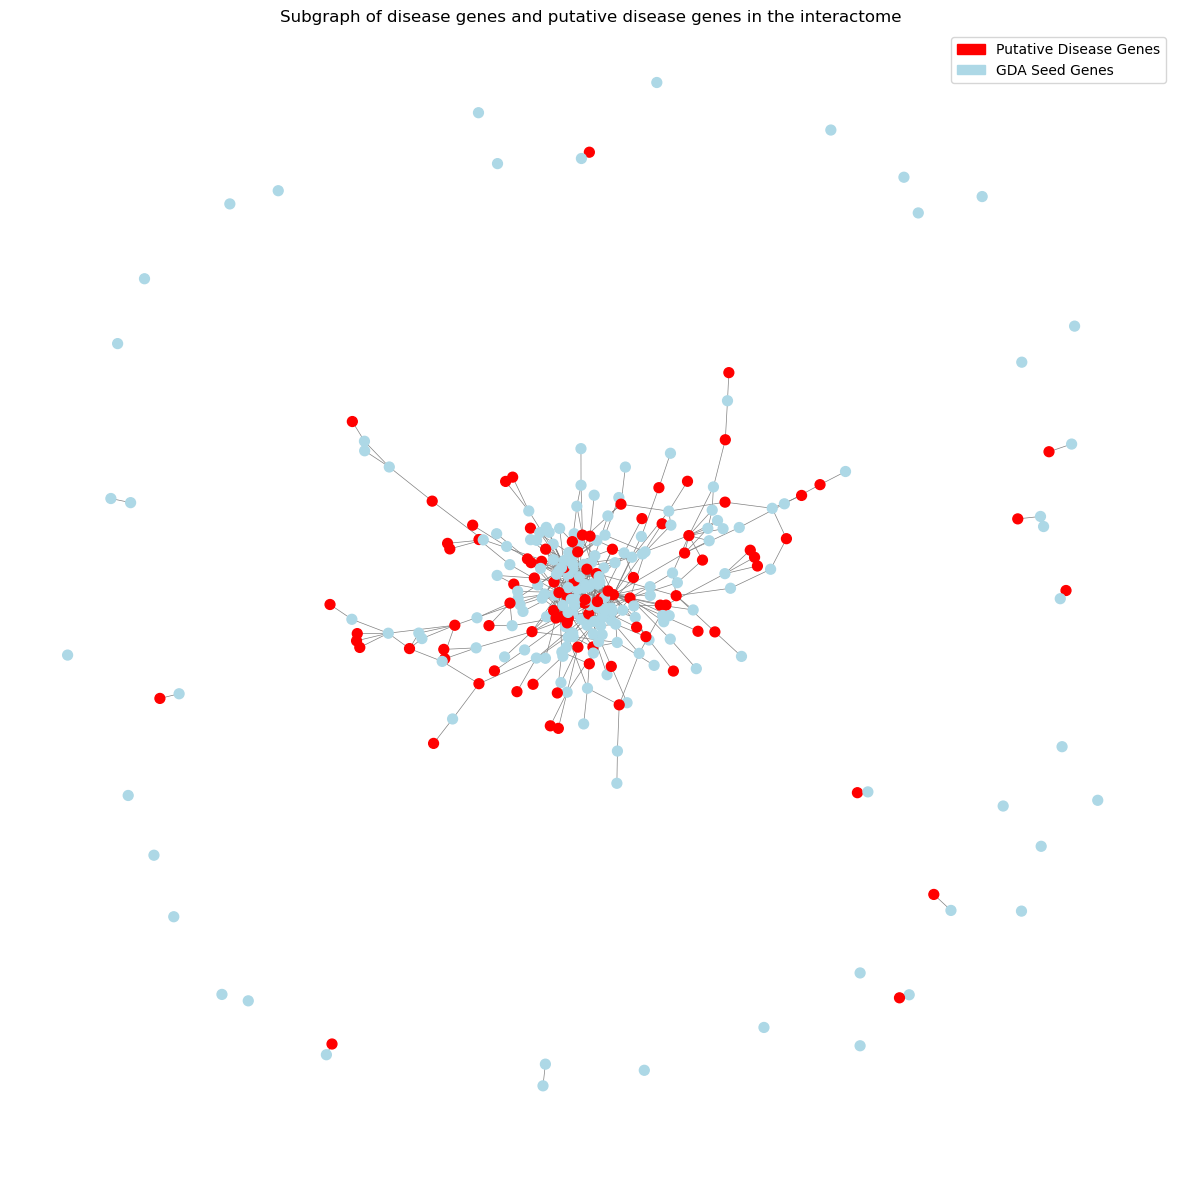

In [11]:
pdg = [elem[0] for elem in putative_disease_genes]

putative_disease_genes_set = set(pdg)
gda_seed_genes_set = set(gda_seed_genes)

putative_disease_interactome = ppi_lcc_graph.subgraph(putative_disease_genes_set.union(gda_seed_genes_set)).copy()

node_colors = ["red" if node in putative_disease_genes_set else "lightblue"
               for node in putative_disease_interactome.nodes()]

pos = nx.spring_layout(putative_disease_interactome)

plt.figure(figsize=(15, 15))

nx.draw_networkx_nodes(putative_disease_interactome,
                       pos,
                       node_size=50,
                       node_color=node_colors)

nx.draw_networkx_edges(putative_disease_interactome,
                       pos,
                       edge_color="gray",
                       width=0.5)

legend_elements = [
    mpatches.Patch(color="red", label="Putative Disease Genes"),
    mpatches.Patch(color="lightblue", label="GDA Seed Genes")
]
plt.legend(handles=legend_elements, loc="upper right")

plt.axis('off')
plt.title("Subgraph of disease genes and putative disease genes in the interactome")
plt.show()

### 3.2 Enrichment analysis

Perform the ***enrichment analysis*** (via EnrichR: GO-BP, GO-MF, GO-CC,
Reactome and KEGG pathways) over the ***putative disease genes***.

Enrichment analysis is a statistical method used to identify biological processes, pathways, or functions that are overrepresented (or enriched) in a given set of genes, compared to a background set. It helps in interpreting large gene lists by associating them with known biological knowledge, such as:

- ***Gene Ontology (GO) terms*** (e.g., Biological Processes, Cellular Components, Molecular Functions).
- ***Pathways*** (e.g., KEGG, Reactome).

To perform the enrichment analysis the list of 100 putative disease genes from point 3.1 (`putative_disease_genes.csv`) was inserted in the [EnrichR](https://maayanlab.cloud/Enrichr/) software. After uploading the gene list, the analysis was performed and the corresponding tables for ***GO-Biological Processes (GO-BP)***, ***GO-Molecular Functions (GO-MF)***, ***GO-Cellular Components (GO-CC)***, ***Reactome Pathways***, and ***KEGG Pathways***, were extracted.

The Enrichr page with the results available at the following link: https://maayanlab.cloud/Enrichr/enrich?dataset=c423dd0357d80aa9a4ff9c856ec41257

In [170]:
# tables were saved to use them later for the overlap evaluation

putative_reactome_df = pd.read_csv(putative_reactome_file, sep='\t', header=0)
putative_KEGG_df = pd.read_csv(putative_KEGG_file, sep='\t', header=0)
putative_Go_MF_df = pd.read_csv(putative_GO_MF_file, sep='\t', header=0)
putative_Go_CC_df = pd.read_csv(putative_GO_CC_file, sep='\t', header=0)
putative_Go_BP_df = pd.read_csv(putative_GO_BP_file, sep='\t', header=0)

In [ ]:
putative_reactome_df.head()

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MyD88 Cascade Initiated on Plasma Membrane,14/98,5.489855e-17,1.637807e-14,0,0,38.403101,1437.852211,APP;MAP2K4;JUN;MAP3K1;MAPK14;MAPK10;MAPK9;MAPK...
1,Toll Like Receptor 10 (TLR10) Cascade,14/98,5.489855e-17,1.637807e-14,0,0,38.403101,1437.852211,APP;MAP2K4;JUN;MAP3K1;MAPK14;MAPK10;MAPK9;MAPK...
2,Toll Like Receptor 5 (TLR5) Cascade,14/98,5.489855e-17,1.637807e-14,0,0,38.403101,1437.852211,APP;MAP2K4;JUN;MAP3K1;MAPK14;MAPK10;MAPK9;MAPK...
3,TRAF6 Mediated Induction of NFkB and MAP Kinas...,14/102,9.844630e-17,2.031186e-14,0,0,36.650106,1350.813696,APP;MAP2K4;JUN;MAP3K1;MAPK14;MAPK10;MAPK9;MAPK...
4,MyD88 Dependent Cascade Initiated on Endosome,14/103,1.134741e-16,2.031186e-14,0,0,36.236478,1330.420728,APP;MAP2K4;JUN;MAP3K1;MAPK14;MAPK10;MAPK9;MAPK...


Perform the ***enrichment analysis*** (via EnrichR: GO-BP, GO-MF, GO-CC,
Reactome and KEGG pathways) for the ***original disease genes*** gathered at
point 1.2

This enrichment analysis was performed as the one over the putative genes, but over the original disease genes (`original_gene.csv`)

The Enrichr page with the results available at the following link: https://maayanlab.cloud/Enrichr/enrich?dataset=bcbc5b49728167ed861a44f4e062b65e

In [172]:
# also those tables were saved

reactome_df = pd.read_csv(original_reactome_file, sep='\t', header=0)
KEGG_df = pd.read_csv(original_KEGG_file, sep='\t', header=0)
Go_MF_df = pd.read_csv(original_GO_MF_file, sep='\t', header=0)
Go_CC_df = pd.read_csv(original_GO_CC_file, sep='\t', header=0)
Go_BP_df = pd.read_csv(original_GO_BP_file, sep='\t', header=0)

reactome_df.head()

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Cilium Assembly,32/200,2.799355e-28,1.004968e-25,0,0,20.306418,1288.299962,ARL6;IFT172;ARL3;CEP164;TTC21B;INPP5E;RHO;BBS9...
1,Organelle Biogenesis and Maintenance,33/297,6.683454e-24,1.199680e-21,0,0,13.333333,711.498765,ARL6;IFT172;ARL3;CEP164;TTC21B;INPP5E;RHO;BBS9...
2,Visual Phototransduction,22/99,5.058395e-23,6.053212e-21,0,0,29.023564,1490.023572,SLC24A1;GUCY2D;PDE6G;ABCA4;GUCA1B;GUCA1A;MYO7A...
3,Cargo Trafficking to the Periciliary Membrane,16/51,1.003761e-19,9.008752e-18,0,0,45.140571,1974.690690,BBS2;BBS1;MKKS;ARL6;ARL3;TTC8;BBS10;BBS12;RP2;...
4,Activation of the Phototransduction Cascade,9/11,9.124149e-17,6.551139e-15,0,0,430.043478,15882.805220,SLC24A1;PDE6G;CNGA1;RHO;SAG;PDE6B;GNAT1;PDE6A;...


***Evaluate the overlap*** (if any) ***between enriched functions*** (i.e. terms
associated with adjusted p-value&lt;0.05) ***of original disease genes and
putative disease genes***.
<br><br><br>
We evaluated the overlap by writing a function that checks whether the functions or pathways enriched in the original disease genes are also enriched in the putative disease genes, therefore providing insight into whether the putative genes are biologically and functionally associated with the original disease genes, by:
1. Identifying enriched terms with adjusted p-values < 0.05 for both datasets.
2. Comparing these terms to find overlaps.
3. Quantifying the overlap using the proportion of shared terms.

In [ ]:
# function for filtering by adjusted p-value (< 0.05) and finding overlaps
def evaluate_overlap(original_df, putative_df, adjusted_pval_col='Adjusted P-value'):
    # filter by adjusted p-value < 0.05
    original_filtered = original_df[original_df[adjusted_pval_col] < 0.05]
    putative_filtered = putative_df[putative_df[adjusted_pval_col] < 0.05]

    # extract sets of terms
    original_terms = set(original_filtered['Term'])
    putative_terms = set(putative_filtered['Term'])

    # compute overlap
    overlap_terms = original_terms.intersection(putative_terms)
    num_overlap = len(overlap_terms)
    proportion_overlap = num_overlap / len(original_terms.union(putative_terms)) if len(original_terms.union(putative_terms)) > 0 else 0

    return {"size original filtered": original_filtered.shape[0],
            "size putative filtered": putative_filtered.shape[0],
            "num_overlap": num_overlap,
            "proportion_overlap": proportion_overlap,
            "overlap_terms": overlap_terms}

# pair putative and original datasets
datasets = {"Reactome Pathways": (reactome_df, putative_reactome_df),
            "KEGG Pathways": (KEGG_df, putative_KEGG_df),
            "GO Molecular Function": (Go_MF_df, putative_Go_MF_df),
            "GO Cellular Component": (Go_CC_df, putative_Go_CC_df),
            "GO Biological Process": (Go_BP_df, putative_Go_BP_df)}

overlap_results = {}

# evaluate overlaps for each category:
for category, (original_df, putative_df) in datasets.items():
    result = evaluate_overlap(original_df, putative_df)
    overlap_results[category] = result

    # print a summary
    print(f"{category}:")
    print(f"  Number of terms in original/putative dataset: {result['size original filtered']} - {result['size putative filtered']}")
    print(f"  Number of overlapping terms: {result['num_overlap']}")

    if result['num_overlap'] > 0:
        print(f"  The overlapping term are: {result['overlap_terms']}")

    print(f"  Proportion of overlap: {result['proportion_overlap']:.2f}")
    print()

Reactome Pathways:
  Number of terms in original/putative dataset: (359, 895)
  Number of overlapping terms: 7
  The overlapping term are: {'G2 M Transition', 'Organelle Biogenesis and Maintenance', 'mRNA Splicing', 'mRNA Splicing - Major Pathway', 'Mitotic G2-G2 M Phases', 'Signaling by Hedgehog', 'Regulation of PLK1 Activity at G2 M Transition'}
  Proportion of overlap: 0.02

KEGG Pathways:
  Number of terms in original/putative dataset: (123, 196)
  Number of overlapping terms: 0
  Proportion of overlap: 0.00

GO Molecular Function:
  Number of terms in original/putative dataset: (225, 195)
  Number of overlapping terms: 0
  Proportion of overlap: 0.00

GO Cellular Component:
  Number of terms in original/putative dataset: (159, 142)
  Number of overlapping terms: 0
  Proportion of overlap: 0.00

GO Biological Process:
  Number of terms in original/putative dataset: (1079, 1217)
  Number of overlapping terms: 3
  The overlapping term are: {'Response To Light Stimulus (GO:0009416)', 

## ***4. Drug repurposing***

Drug repurposing is the process of identifying new uses for existing drugs that are outside the scope of their original medical indications. This approach leverages existing drugs' known pharmacological properties to address unmet medical needs or explore novel therapeutic areas.

### 4.1 Drug identification

- Select the first 20 putative disease genes in the ranking obtained at point 3.1

In [68]:
putative_disease_genes_df = pd.read_csv(putative_csv_filepath, sep=',', header=0)

# select the first 20 rows
first_20_genes = putative_disease_genes_df.iloc[:20].copy()
first_20_genes

,Gene,Rank score
0,NKX6-2,0.000893
1,GPR65,0.000576
2,BBIP1,0.000458
3,DEFB118,0.000408
4,LZTFL1,0.000354
5,CALHM1,0.000337
6,GUCY2F,0.000282
7,OR6C1,0.000280
8,IFT43,0.000269
9,NRXN1,0.000264


Use [DGIdb](https://dgidb.org/) latest `“interactions.tsv”` [as of 01.01.25 23:38 p.m.] file to associate such 20
genes (column “gene_name”) to approved drugs (column “drug_name”,
column “approved”=True) (access the db file manually or via API at your own
convenience).

In [10]:
# load the DGIdb interactions file
dgidb_data = pd.read_csv(dgidb_file, sep='\t')

# display the first few rows to understand the structure
dgidb_data.head()

,gene_claim_name,gene_concept_id,gene_name,interaction_source_db_name,interaction_source_db_version,interaction_type,interaction_score,drug_claim_name,drug_concept_id,drug_name,approved,immunotherapy,anti_neoplastic
0,CYP2D6,hgnc:2625,CYP2D6,DTC,9/2/20,NaN,0.017709,RACLOPRIDE,ncit:C152139,RACLOPRIDE,False,False,False
1,PPARG,hgnc:9236,PPARG,DTC,9/2/20,NaN,0.840123,KALOPANAX-SAPONIN F,chembl:CHEMBL1833984,CHEMBL:CHEMBL1833984,False,False,False
2,ATAD5,hgnc:25752,ATAD5,DTC,9/2/20,NaN,0.177992,RO-5-3335,chembl:CHEMBL91609,CHEMBL:CHEMBL91609,False,False,False
3,RGS4,hgnc:10000,RGS4,DTC,9/2/20,NaN,0.034319,"3,4-DICHLOROISOCOUMARIN",drugbank:DB04459,"3,4-DICHLOROISOCOUMARIN",False,False,False
4,MAPK1,hgnc:6871,MAPK1,DTC,9/2/20,NaN,0.050007,WITHAFERIN A,iuphar.ligand:13097,WITHAFERIN A,False,False,False


In [99]:
# put the genes of interest in a list
genes_of_interest = first_20_genes['Gene'].tolist()

# filter for approved drugs and genes of interest
approved_drugs = dgidb_data[
    (dgidb_data['gene_name'].isin(genes_of_interest)) & (dgidb_data['approved'] == True)
]

# select only the gene_name, drug_name, and approved columns
approved_drugs = approved_drugs[['gene_name', 'drug_name', 'approved']]

# display the filtered DataFrame
approved_drugs

,gene_name,drug_name,approved
52584,BHMT,BETAINE HYDROCHLORIDE,True
77851,NRXN1,DULOXETINE HYDROCHLORIDE,True
79759,BHMT,BETAINE,True
96199,NRXN1,NICOTINE POLACRILEX,True


We could check if these genes are present in the `gda_datatframe`

In [126]:
# Filter the row where Gene is "BHMT"
bhmt_row = gda_dataframe[gda_dataframe["Gene"] == "BHMT"]
nrxn1_row = gda_dataframe[gda_dataframe["Gene"] == "NRXN1"]

print(bhmt_row)
print(nrxn1_row)

Empty DataFrame
Columns: [DOClass, Disease, DiseaseClass, EvidenceIndexGDA, EvidenceLevelGDA, FirstRef, Gene, GeneDPI, GeneDSI, GeneFullName, GenePLI, HPOClass, LastRef, NumDiseasesAssociatedToGene, NumGenesDisease, NumPMIDs, NumVariantsAssociatedToGene, NumVariantsDisease, NumVariantsGDA, PathwayIDs, PathwayNames, ProteinClass, ScoreGDA, SemanticType, Type, UnitProt, diseaseUMLSCUI, geneEnsemblIDs, geneNcbiID, geneNcbiType, numCTs, numberChemsIncludedInEvidence, numberPmidsWithChemsIncludedInEvidence]
Index: []

[0 rows x 33 columns]
Empty DataFrame
Columns: [DOClass, Disease, DiseaseClass, EvidenceIndexGDA, EvidenceLevelGDA, FirstRef, Gene, GeneDPI, GeneDSI, GeneFullName, GenePLI, HPOClass, LastRef, NumDiseasesAssociatedToGene, NumGenesDisease, NumPMIDs, NumVariantsAssociatedToGene, NumVariantsDisease, NumVariantsGDA, PathwayIDs, PathwayNames, ProteinClass, ScoreGDA, SemanticType, Type, UnitProt, diseaseUMLSCUI, geneEnsemblIDs, geneNcbiID, geneNcbiType, numCTs, numberChemsIncludedInE

> They are not present, which could stringly suggest that they are not currently known to be directly associated with the disease we're investigating

Now we can check how many genes have approved drugs in the DGIdb dataset:

In [100]:
unique_genes = approved_drugs['gene_name'].nunique()
print(f"Number of unique genes: {unique_genes}")

Number of unique genes: 2


> We can see that only 2 genes out of 20 are presents, let's check if they are associated with `'approved'== False`



In [101]:
# which genes are missing?
missing_genes = set(genes_of_interest) - set(approved_drugs['gene_name'].unique())
print(missing_genes)

{'ALG14', 'DEFB118', 'VGLL2', 'OR6C1', 'GUCY2F', 'IFT43', 'NKX6-2', 'DOC2A', 'PTN', 'LZTFL1', 'STPG2', 'BBIP1', 'FAM84A', 'CALHM1', 'GPR65', 'CCDC144A', 'C1RL', 'NME3'}


In [93]:
# filter for missing genes and unapproved drugs

missing_genes_drugs = dgidb_data[
    (dgidb_data['gene_name'].isin(missing_genes)) &
    (dgidb_data['approved'] == False)
]

missing_genes_drugs[['gene_name', 'drug_name', 'approved']]

,gene_name,drug_name,approved


> So we can see that the missing genes are not even present the DGIdb interactions file (further confirmed by a manual check of all the 20 genes taken from point 3.1)

Compile a ***ranking of identified drugs***, starting with the drug associated with the most of the above 20 genes, moving downward.

In [103]:
# counting the number of unique genes associated with each drug
drug_gene_count = approved_drugs['drug_name'].value_counts().reset_index()

# renaming the columns for clarity
drug_gene_count.columns = ['drug_name', 'genes_count']

top_20_drugs = drug_gene_count.head(20)
top_20_drugs

,drug_name,genes_count
0,BETAINE HYDROCHLORIDE,1
1,DULOXETINE HYDROCHLORIDE,1
2,BETAINE,1
3,NICOTINE POLACRILEX,1


### 4.2 Clinical Trials validation

Take the first three drugs and for each of them taken individually check on
[ClinicalTrials.gov](https://clinicaltrials.gov) if there are clinical trials testing the drug (search field: “other terms”) for the disease of interest (search field: “condition or disease”) and note the number of clinical trials, optionally reporting the title and ID (NTC…) of one of them that cites drug name and disease name.

In [104]:
# so we have to check the above thing for the following drugs:
top_3_drugs = drug_gene_count.head(3)

top_3_drugs['drug_name']

,drug_name
0,BETAINE HYDROCHLORIDE
1,DULOXETINE HYDROCHLORIDE
2,BETAINE


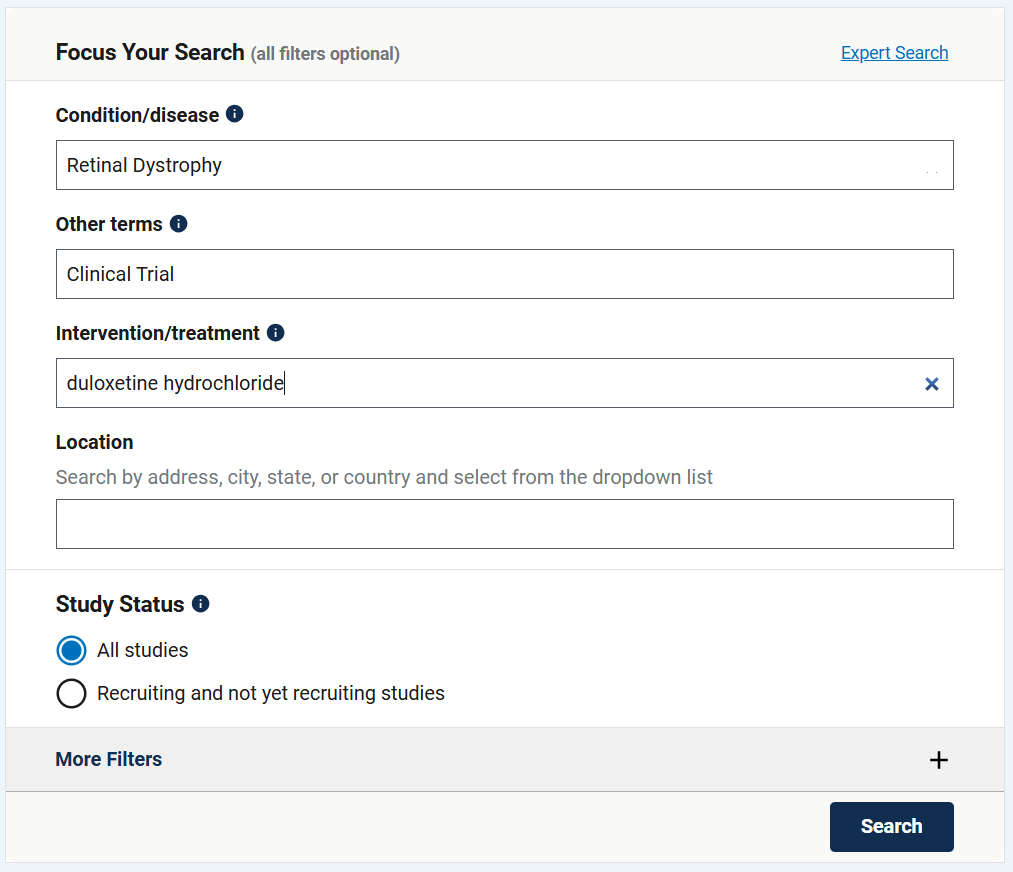

No clinical trials were found on [ClinicalTrials.gov](https://clinicaltrials.gov) testing ***Betaine Hydrochloride***, ***Duloxetine Hydrochloride***, or ***Betaine*** for retinal dystrophy as of 02.01.25. This is likely because:<br>

- **Betaine Hydrochloride**: *Betaine hydrochloride is a hydrochloride salt form of betaine, a methyl group donor involved in the methionine metabolic cycle. It's used to treat homocystinuria, a disorder leading to elevated homocysteine levels.*<br> In other words, Betaine Hydrochloride is commonly used as a dietary supplement to aid digestion [[1]](https://go.drugbank.com/salts/DBSALT001448)

- **Duloxetine Hydrochloride**: *Duloxetine hydrochloride is a dual serotonin and norepinephrine reuptake inhibitor (SNRI) approved for treating major depressive disorder, neuropathic pain, generalized anxiety disorder, osteoarthritis, and stress incontinence.*<br> In simpler terms, it's a medication that helps improve mood and alleviate pain by balancing certain chemicals in the brain.[[2]](https://go.drugbank.com/salts/DBSALT000378)

- **Betaine**: *Betaine is a methyl group donor used for the treatment of homocystinuria to decrease elevated homocysteine blood levels.*<br> It is a medication prescribed for specific metabolic disorders. [[3]](https://go.drugbank.com/drugs/DB06756)

To ensure the accuracy of the search also **Nicotine Polacrilex**, a medication that helps improve mood and alleviate pain by balancing certain chemicals in the brain [[4]](https://go.drugbank.com/drugs/DB00184), was subsequently reviewed, confirming that none were associated with clinical trials for retinal dystrophy.

## ***5. Optional task***

Run PROCONSUL (temp=1) and compare top 20 genes with top 20 from the best performer
algorithm chosen at point 3.1.

The **ProConsul algorithm** is a network-based gene prioritization tool designed to predict genes potentially associated with a disease, leveraging known seed genes and their connections within a gene interaction network. It operates by iteratively analyzing the network to rank genes based on their proximity and connectivity to the seed genes.

The algorithm takes as input a network represented by an edge list and a set of seed genes known to be linked to the disease. Using probabilistic measures, such as hypergeometric distributions, it calculates the likelihood of each gene being associated with the disease. To enhance selection accuracy, ProConsul applies techniques like temperature scaling, softmax normalization, and optional sampling strategies (e.g., top-k and nucleus sampling).

Through multiple iterations, it reduces statistical fluctuations and generates a ranked list of predicted genes. These predictions are useful for expanding disease-related gene sets and guiding further experimental research in biological and medical studies.

In [11]:
# initialize PROCONSUL parameters
network_edgelist_file = ppi_lcc_filepath
seeds_file = seed_genes_filepath
n = 20
alpha = 1
temp= 1 # as asked
outfile_name = proconsul_output_filepath

# read the network and the seed genes:
ppi_lcc_graph, seed_genes = proconsul.read_files(network_edgelist_file, seeds_file)

# run PROCONSUL
proconsul_output = proconsul.PROCONSUL(G_original=ppi_lcc_graph,
                seed_genes=seed_genes,
                max_number_of_added_nodes=n,
                alpha=alpha,
                temp = temp,
                outfile=outfile_name)

PROCONSUL(): Round 1/10
PROCONSUL(): Round 2/10
PROCONSUL(): Round 3/10
PROCONSUL(): Round 4/10
PROCONSUL(): Round 5/10
PROCONSUL(): Round 6/10
PROCONSUL(): Round 7/10
PROCONSUL(): Round 8/10
PROCONSUL(): Round 9/10
PROCONSUL(): Round 10/10


In [12]:
proconsul_df = pd.DataFrame(proconsul_output, columns=['Putative Disease Gene', 'Rank Score'])
print(proconsul_df)

   Putative Disease Gene  Rank Score
0                 LZTFL1        19.8
1                   PCM1        18.5
2                 SSX2IP        17.0
3               KIAA0753        14.1
4                  HAUS8        13.6
5                    FTL        12.8
6                   POC5        12.5
7                CCDC138         8.7
8                    NIN         8.4
9                  CSPP1         7.7
10                 SASS6         6.8
11                CEP162         6.8
12                CEP128         6.2
13                DUSP16         6.1
14                CCDC14         5.1
15               TBC1D31         4.8
16                 NDC80         4.7
17                  NINL         4.6
18                 WDR83         4.2
19                 HAUS3         4.1


Top 20 genes from the best performer algorithm chosen at point 3.1 :

In [112]:
diffusion_data = first_20_genes
diffusion_df = pd.DataFrame(diffusion_data, columns=["Gene", "Rank score"])
print(diffusion_data)

        Gene  Rank score
0     NKX6-2    0.000893
1      GPR65    0.000576
2      BBIP1    0.000458
3    DEFB118    0.000408
4     LZTFL1    0.000354
5     CALHM1    0.000337
6     GUCY2F    0.000282
7      OR6C1    0.000280
8      IFT43    0.000269
9      NRXN1    0.000264
10     VGLL2    0.000258
11     DOC2A    0.000254
12  CCDC144A    0.000251
13       PTN    0.000247
14     STPG2    0.000242
15     ALG14    0.000241
16      NME3    0.000241
17      C1RL    0.000235
18    FAM84A    0.000235
19      BHMT    0.000232


We first check if we have any overlapping genese, then we can compare the 2 lists with the ***Spearman Footnote distance*** and the ***Weighted Kendall-Tau distance***:

In [ ]:
#check the overlap between diffusion_df and proconsul_df
overlap_df = pd.merge(
    diffusion_df, proconsul_df,
    left_on="Gene", right_on="Putative Disease Gene",
    how="inner"
)

print(overlap_df)

> From this result we can see that we only have one common gene, LZTFL1, so using metrics like Kendall Tau and Spearman Footnote distance wouldn't be meaningful



We can try to do drug reporposing to see if we have some better or inetresting results

In [13]:
# put the genes of interest in a list
genes_of_interest_proconsul = proconsul_df['Putative Disease Gene'].tolist()

# filter for approved drugs and genes of interest
approved_drugs_proconsul = dgidb_data[
    (dgidb_data['gene_name'].isin(genes_of_interest_proconsul)) & (dgidb_data['approved'] == True)
]

# select only the gene_name, drug_name, and approved columns
approved_drugs_proconsul = approved_drugs_proconsul[['gene_name', 'drug_name', 'approved']]

# display the filtered DataFrame
approved_drugs_proconsul

,gene_name,drug_name,approved
